# **1. Xử lý dữ liệu thô**

In [1]:
import numpy as np
import pandas as pd
import csv

## 1.1 Đọc dữ liệu

Một [ví dụ](https://s.cafef.vn/Lich-su-giao-dich-SHS-1.chn) cho mã SHS.

In [2]:
# Đọc dữ liệu
dtset = pd.read_csv('chungkhoangia.csv') 
print(dtset.shape) # (số Dòng, số Cột)
print(dtset.columns.tolist()) # Tên các cột thuộc tính
dtset.info()

(11363, 13)
['Unnamed: 0', 'mack', 'date_publish', 'price_adjustment', 'price_closing', 'rate_of_change', 'gdkl_kl', 'gdkl_gt', 'gdtt_kl', 'gdtt_gt', 'price_open', 'price_highest', 'price_lowest']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363 entries, 0 to 11362
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11363 non-null  int64  
 1   mack              11363 non-null  object 
 2   date_publish      11363 non-null  object 
 3   price_adjustment  10908 non-null  float64
 4   price_closing     10908 non-null  float64
 5   rate_of_change    11363 non-null  object 
 6   gdkl_kl           10908 non-null  object 
 7   gdkl_gt           10908 non-null  object 
 8   gdtt_kl           10908 non-null  object 
 9   gdtt_gt           11363 non-null  object 
 10  price_open        10908 non-null  float64
 11  price_highest     10908 non-null  float64
 12  price_lowest      10908 non-nul

In [3]:
dtset.head(5)

Unnamed: 0 mack date_publish  price_adjustment  price_closing  \
0           0  CMX   28/01/2021             11.29          14.20   
1           1  CMX   27/01/2021             12.12          15.25   
2           2  CMX   26/01/2021             12.88          16.20   
3           3  CMX   25/01/2021             13.44          16.90   
4           4  CMX   22/01/2021             13.48          16.95   

    rate_of_change  gdkl_kl        gdkl_gt gdtt_kl gdtt_gt  price_open  \
0  -1.05 (-6.89 %)  538,500  7,654,000,000       0       0        14.2   
1  -0.95 (-5.86 %)  608,800  9,439,000,000       0       0        15.9   
2  -0.70 (-4.14 %)  355,600  5,785,000,000       0       0        16.7   
3  -0.05 (-0.29 %)  477,000  7,943,000,000       0       0        16.7   
4  -0.45 (-2.59 %)  518,900  8,882,000,000       0       0        17.1   

   price_highest  price_lowest  
0          14.50         14.20  
1          16.10         15.10  
2          16.90         15.85  
3          16.95         16.40  
4          17.35         16.90

In [4]:
dtset.tail(5)

Unnamed: 0 mack date_publish  price_adjustment  price_closing  \
11358       11358  DRH   14/10/2022              5.64           5.64   
11359       11359  DRH   13/10/2022              5.51           5.51   
11360       11360  DRH   12/10/2022              5.19           5.19   
11361       11361  DRH   11/10/2022              5.58           5.58   
11362       11362  DRH   10/10/2022              6.00           6.00   

        rate_of_change    gdkl_kl         gdkl_gt  gdtt_kl        gdtt_gt  \
11358    0.13 (2.36 %)  2,107,900  11,906,000,000        0              0   
11359    0.32 (6.17 %)  5,070,800  27,348,000,000  350,000  1,942,500,000   
11360  -0.39 (-6.99 %)  1,814,800   9,526,000,000        0              0   
11361  -0.42 (-7.00 %)    900,000   5,037,000,000        0              0   
11362    0.00 (0.00 %)  2,374,900  13,423,000,000        0              0   

       price_open  price_highest  price_lowest  
11358        5.72           5.74          5.51  
11359        5.11           5.55          5.11  
11360        5.20           5.50          5.19  
11361        5.90           5.90          5.58  
11362        5.58           6.00          5.58

In [5]:
# Kiểm tra xem có dữ liệu nào bị trùng lập không:
dtset[dtset.duplicated()]
# Kết luận: Không có dữ liệu bị trùng.

Empty DataFrame
Columns: [Unnamed: 0, mack, date_publish, price_adjustment, price_closing, rate_of_change, gdkl_kl, gdkl_gt, gdtt_kl, gdtt_gt, price_open, price_highest, price_lowest]
Index: []

In [6]:
# Kiểm tra xem có dữ liệu nào bị thiếu không:
dtset.isnull().sum()

Unnamed: 0            0
mack                  0
date_publish          0
price_adjustment    455
price_closing       455
rate_of_change        0
gdkl_kl             455
gdkl_gt             455
gdtt_kl             455
gdtt_gt               0
price_open          455
price_highest       455
price_lowest        455
dtype: int64

In [7]:
missingValueDF = dtset[dtset.isnull().any(axis=1)]
missingValueDF

Unnamed: 0 mack date_publish  price_adjustment  price_closing  \
1820        1820  TS4   07/01/2021               NaN            NaN   
1821        1821  TS4   06/01/2021               NaN            NaN   
1822        1822  TS4   05/01/2021               NaN            NaN   
1823        1823  TS4   04/01/2021               NaN            NaN   
1824        1824  TS4   31/12/2020               NaN            NaN   
...          ...  ...          ...               ...            ...   
2270        2270  TS4   11/10/2022               NaN            NaN   
2271        2271  TS4   10/10/2022               NaN            NaN   
2272        2272  TS4   07/10/2022               NaN            NaN   
2273        2273  TS4   06/10/2022               NaN            NaN   
2274        2274  TS4   05/10/2022               NaN            NaN   

       rate_of_change gdkl_kl gdkl_gt gdtt_kl gdtt_gt  price_open  \
1820    0.00 (0.00 %)     NaN     NaN     NaN       0         NaN   
1821    0.00 (0.00 %)     NaN     NaN     NaN       0         NaN   
1822    0.08 (2.28 %)     NaN     NaN     NaN       0         NaN   
1823  -0.04 (-1.13 %)     NaN     NaN     NaN       0         NaN   
1824  -0.02 (-0.56 %)     NaN     NaN     NaN       0         NaN   
...               ...     ...     ...     ...     ...         ...   
2270    0.00 (0.00 %)     NaN     NaN     NaN       0         NaN   
2271    0.00 (0.00 %)     NaN     NaN     NaN       0         NaN   
2272    0.00 (0.00 %)     NaN     NaN     NaN       0         NaN   
2273    0.00 (0.00 %)     NaN     NaN     NaN       0         NaN   
2274    0.00 (0.00 %)     NaN     NaN     NaN       0         NaN   

      price_highest  price_lowest  
1820            NaN           NaN  
1821            NaN           NaN  
1822            NaN           NaN  
1823            NaN           NaN  
1824            NaN           NaN  
...             ...           ...  
2270            NaN           NaN  
2271            NaN           NaN  
2272            NaN           NaN  
2273            NaN           NaN  
2274            NaN           NaN  

[455 rows x 13 columns]

Do dữ liệu bị missing toàn là của mã TS4 nên chúng ta sẽ phải xóa chúng đi.

In [8]:
# Xóa tất cả các dòng thuộc mã TS4:
print(dtset.mack.unique())
print(dtset.shape)
# dtset = dtset[~dtset.isin(['TS4']).any(axis=1)] # Xóa toàn bộ dòng có "TS4" ở bất kỳ cột nào
dtset = dtset[~dtset.mack.str.contains("TS4")] # Chỉ xóa những dòng nào có chứa "TS4" tại cột mack của Dataset
print(dtset.mack.unique())
print(dtset.shape)
# Kiểm tra lại xem còn dữ liệu nào bị thiếu không:
dtset.isnull().sum()

['CMX' 'ACL' 'IDI' 'ABT' 'TS4' 'DAT' 'VHC' 'AAM' 'VPB' 'VIB' 'VCB' 'TPB'
 'TCB' 'STB' 'SSB' 'OCB' 'MSB' 'MBB' 'LPB' 'HDB' 'EIB' 'CTG' 'BID' 'ACB'
 'DRH']
(11363, 13)
['CMX' 'ACL' 'IDI' 'ABT' 'DAT' 'VHC' 'AAM' 'VPB' 'VIB' 'VCB' 'TPB' 'TCB'
 'STB' 'SSB' 'OCB' 'MSB' 'MBB' 'LPB' 'HDB' 'EIB' 'CTG' 'BID' 'ACB' 'DRH']
(10908, 13)


Unnamed: 0          0
mack                0
date_publish        0
price_adjustment    0
price_closing       0
rate_of_change      0
gdkl_kl             0
gdkl_gt             0
gdtt_kl             0
gdtt_gt             0
price_open          0
price_highest       0
price_lowest        0
dtype: int64

## 1.2 Xử lý Giá đóng, mở, kịch trần, kịch sàn, đóng cửa điều chỉnh (nếu Missing)

In [9]:
# Thường những dữ liệu quan trọng, được sử dụng nhiều để dự đoán giá Chứng khoán như:
# Giá mở cửa, Giá đóng cửa, Giá kịch sàn, Giá kịch trần, Giá đóng cửa điều chỉnh, ...
# Đều có dạng float, do đó, chúng ta sẽ ưu tiên gọi các đặc trưng này:
dtset.loc[:, dtset.dtypes == float].isnull().sum() # Và kiểm tra xem chúng có bị NaN hay không?
# Câu lệnh 'dtset.loc[Index của DÒNG, TÊN CỘT]' sẽ trả về các dòng dữ liệu mong muốn của cột chỉ định.

price_adjustment    0
price_closing       0
price_open          0
price_highest       0
price_lowest        0
dtype: int64

In [10]:
# Trong trường hợp các đặc trưng trên bị thiếu dữ liệu, chúng ta sẽ:
dtset.loc[:, dtset.dtypes == float] = dtset.loc[:, dtset.dtypes == float].fillna(method ='pad') # Điền vào các giá trị null bằng giá trị ở ngay trên nó,
# Hay nói cách khác là thay thế những ngày không có dữ liệu bằng dữ liệu của ngày gần nhất trước đó.
dtset.isnull().sum()

Unnamed: 0          0
mack                0
date_publish        0
price_adjustment    0
price_closing       0
rate_of_change      0
gdkl_kl             0
gdkl_gt             0
gdtt_kl             0
gdtt_gt             0
price_open          0
price_highest       0
price_lowest        0
dtype: int64

## 1.3 Xử lý 4 cột thuộc GD khớp lệnh, GD thỏa thuận

In [11]:
# Điền 0 vào thay các Mising Values của 4 cột 'gdkl_kl', 'gdkl_gt', 'gdtt_gt', 'gdtt_gt':
GD = ['gdkl_kl', 'gdkl_gt', 'gdtt_kl', 'gdtt_gt']
for giaodich in GD:
  dtset[giaodich] = dtset[giaodich].fillna(value=0)
dtset.isnull().sum()

Unnamed: 0          0
mack                0
date_publish        0
price_adjustment    0
price_closing       0
rate_of_change      0
gdkl_kl             0
gdkl_gt             0
gdtt_kl             0
gdtt_gt             0
price_open          0
price_highest       0
price_lowest        0
dtype: int64

In [12]:
# Chuyển 4 cột trên từ Object về Float:
for giaodich in GD:
  dtset[giaodich] = dtset[giaodich].str.replace(',', '').astype(float)
dtset[['gdkl_kl', 'gdkl_gt', 'gdtt_kl', 'gdtt_gt']].dtypes

gdkl_kl    float64
gdkl_gt    float64
gdtt_kl    float64
gdtt_gt    float64
dtype: object

In [13]:
dtset[['gdkl_kl', 'gdkl_gt', 'gdtt_kl', 'gdtt_gt']].head()

gdkl_kl       gdkl_gt  gdtt_kl  gdtt_gt
0  538500.0  7.654000e+09      0.0      0.0
1  608800.0  9.439000e+09      0.0      0.0
2  355600.0  5.785000e+09      0.0      0.0
3  477000.0  7.943000e+09      0.0      0.0
4  518900.0  8.882000e+09      0.0      0.0

## 1.4 Xử lý cột Rate of change (ROC)

**Công thức Rate of Change** = `(Price Closing ngày hôm nay - Price Closing ngày hôm qua)`

**Công thức Rate of Change** (tính theo %) = `[(Price Closing ngày hôm nay - Price Closing ngày hôm qua)/(Price Closing ngày hôm qua)]*100`

In [14]:
# Xóa đi ROC(%), Chỉ giữ lại ROC cơ bản:
dtset['rate_of_change'] = dtset['rate_of_change'].str.split('(').str[0]

In [15]:
dtset.tail(3)

Unnamed: 0 mack date_publish  price_adjustment  price_closing  \
11360       11360  DRH   12/10/2022              5.19           5.19   
11361       11361  DRH   11/10/2022              5.58           5.58   
11362       11362  DRH   10/10/2022              6.00           6.00   

      rate_of_change    gdkl_kl       gdkl_gt  gdtt_kl  gdtt_gt  price_open  \
11360         -0.39   1814800.0  9.526000e+09      0.0      0.0        5.20   
11361         -0.42    900000.0  5.037000e+09      0.0      0.0        5.90   
11362          0.00   2374900.0  1.342300e+10      0.0      0.0        5.58   

       price_highest  price_lowest  
11360            5.5          5.19  
11361            5.9          5.58  
11362            6.0          5.58

In [16]:
# Convert Object to Float:
dtset['rate_of_change'] = dtset['rate_of_change'].astype(float)

In [17]:
dtset.dtypes

Unnamed: 0            int64
mack                 object
date_publish         object
price_adjustment    float64
price_closing       float64
rate_of_change      float64
gdkl_kl             float64
gdkl_gt             float64
gdtt_kl             float64
gdtt_gt             float64
price_open          float64
price_highest       float64
price_lowest        float64
dtype: object

## 1.5 Tách mỗi mã thành một Dataset riêng

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Tách Dataset ban đầu ra thành nhiều dataset,
# Mỗi mã chứng khoán sẽ có một dataset của riêng nó, được lưu dưới dạng file CSV.
MACK = dtset.mack.unique()
print(MACK)

grouped = dtset.groupby(dtset.mack) # grouping by particular dataframe column
ExportFileName = 'Mã chứng khoán'
for TenMaCK in MACK:
  ExportFileName = grouped.get_group(str(TenMaCK)) # Cắt những dòng có cột 'mack' là tên Mã chứng khoán đang duyệt
  ExportFileName.to_csv(str(TenMaCK)+'.csv')

['CMX' 'ACL' 'IDI' 'ABT' 'DAT' 'VHC' 'AAM' 'VPB' 'VIB' 'VCB' 'TPB' 'TCB'
 'STB' 'SSB' 'OCB' 'MSB' 'MBB' 'LPB' 'HDB' 'EIB' 'CTG' 'BID' 'ACB' 'DRH']


In [20]:
print('Dataset Gốc', ':', dtset.shape)
for TenMaCK in MACK:
  ExportCSV_File = pd.read_csv(str(TenMaCK) + '.csv')
  # Chuyển index từ 'Unnamed' sang 'date_publish':
  ExportCSV_File['date_publish'] = pd.to_datetime(ExportCSV_File['date_publish'], dayfirst=True) # Convert Object (DD/MM/YYYY) sang Datetime (YYYY-MM-DD)
  ExportCSV_File['date_publish'] = ExportCSV_File.date_publish.dt.date # Bỏ lấy <giờ:phút:giây>
  ExportCSV_File.sort_values(by=['date_publish'], inplace=True, ascending=True) # Sort lại cho từ quá khứ đến hiện tại
  ExportCSV_File.set_index('date_publish', inplace=True) # Đặt 'date_publish' làm index
  ExportCSV_File = ExportCSV_File.loc[:, ~ExportCSV_File.columns.str.contains('^Unnamed')] # Xóa các cột Unnamed nếu có
  ExportCSV_File = ExportCSV_File.drop(columns=['mack']) # Xóa cột tên Mã chứng khoán của mã đó
  ExportCSV_File.to_csv(str(TenMaCK)+'.csv') # Xuất ra file CSV
  print(str(TenMaCK), ':', ExportCSV_File.shape) # Tên mã : (số Dòng, số Cột)

Dataset Gốc : (10908, 13)
CMX : (460, 10)
ACL : (460, 10)
IDI : (460, 10)
ABT : (440, 10)
DAT : (460, 10)
VHC : (460, 10)
AAM : (460, 10)
VPB : (460, 10)
VIB : (460, 10)
VCB : (460, 10)
TPB : (460, 10)
TCB : (460, 10)
STB : (460, 10)
SSB : (407, 10)
OCB : (441, 10)
MSB : (460, 10)
MBB : (460, 10)
LPB : (460, 10)
HDB : (460, 10)
EIB : (460, 10)
CTG : (420, 10)
BID : (460, 10)
ACB : (460, 10)
DRH : (460, 10)


# **2. Gọi một mã bất kỳ**

In [21]:
import matplotlib.pyplot as plt
# plt.style.use("fivethirtyeight") # Dùng Style cụ thể
import seaborn as sns
import pandas as pd
import csv

## 2.1 Chọn Mã Chứng Khoán

In [22]:
import os
os.getcwd() # Folder hiện tại

id = input("Mời bạn Nhập mã Chứng khoán: ") # Ví dụ: AAM, BID, CMX, DAT, HDB, ...
FileName = str(id) + ".csv"

if(os.path.exists(FileName) and os.path.isfile(FileName)):
  base_df = pd.read_csv(FileName, index_col='date_publish', parse_dates=True, dayfirst=True)
  base_df.info()
else:
  print("Không tìm thấy Dataset!")

Mời bạn Nhập mã Chứng khoán: DRH
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460 entries, 2020-12-31 to 2022-11-04
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_adjustment  460 non-null    float64
 1   price_closing     460 non-null    float64
 2   rate_of_change    460 non-null    float64
 3   gdkl_kl           460 non-null    float64
 4   gdkl_gt           460 non-null    float64
 5   gdtt_kl           460 non-null    float64
 6   gdtt_gt           460 non-null    float64
 7   price_open        460 non-null    float64
 8   price_highest     460 non-null    float64
 9   price_lowest      460 non-null    float64
dtypes: float64(10)
memory usage: 39.5 KB


In [23]:
base_df.isnull().sum()

price_adjustment    0
price_closing       0
rate_of_change      0
gdkl_kl             0
gdkl_gt             0
gdtt_kl             0
gdtt_gt             0
price_open          0
price_highest       0
price_lowest        0
dtype: int64

In [24]:
base_df.head(3)

price_adjustment  price_closing  rate_of_change    gdkl_kl  \
date_publish                                                               
2020-12-31                8.20          10.65            0.67  2349560.0   
2021-01-04                8.47          11.00            0.35  2531100.0   
2021-01-05                9.01          11.70            0.70  2648800.0   

                   gdkl_gt   gdtt_kl       gdtt_gt  price_open  price_highest  \
date_publish                                                                    
2020-12-31    2.403000e+10       0.0  0.000000e+00        9.88          10.65   
2021-01-04    2.829900e+10  190428.0  1.887141e+09       11.20          11.35   
2021-01-05    2.955400e+10       0.0  0.000000e+00       10.75          11.75   

              price_lowest  
date_publish                
2020-12-31            9.69  
2021-01-04           10.80  
2021-01-05           10.70

In [25]:
base_df.tail(3)

price_adjustment  price_closing  rate_of_change    gdkl_kl  \
date_publish                                                               
2022-11-02                4.62           4.62            0.02   670800.0   
2022-11-03                4.68           4.68            0.06  1310600.0   
2022-11-04                4.36           4.36           -0.32  1620000.0   

                   gdkl_gt  gdtt_kl  gdtt_gt  price_open  price_highest  \
date_publish                                                              
2022-11-02    3.115000e+09      0.0      0.0        4.60           4.72   
2022-11-03    6.068000e+09      0.0      0.0        4.51           4.78   
2022-11-04    7.124000e+09      0.0      0.0        4.67           4.69   

              price_lowest  
date_publish                
2022-11-02            4.60  
2022-11-03            4.48  
2022-11-04            4.36

## 2.2 Vẽ hình

In [26]:
import warnings
warnings.filterwarnings("ignore")

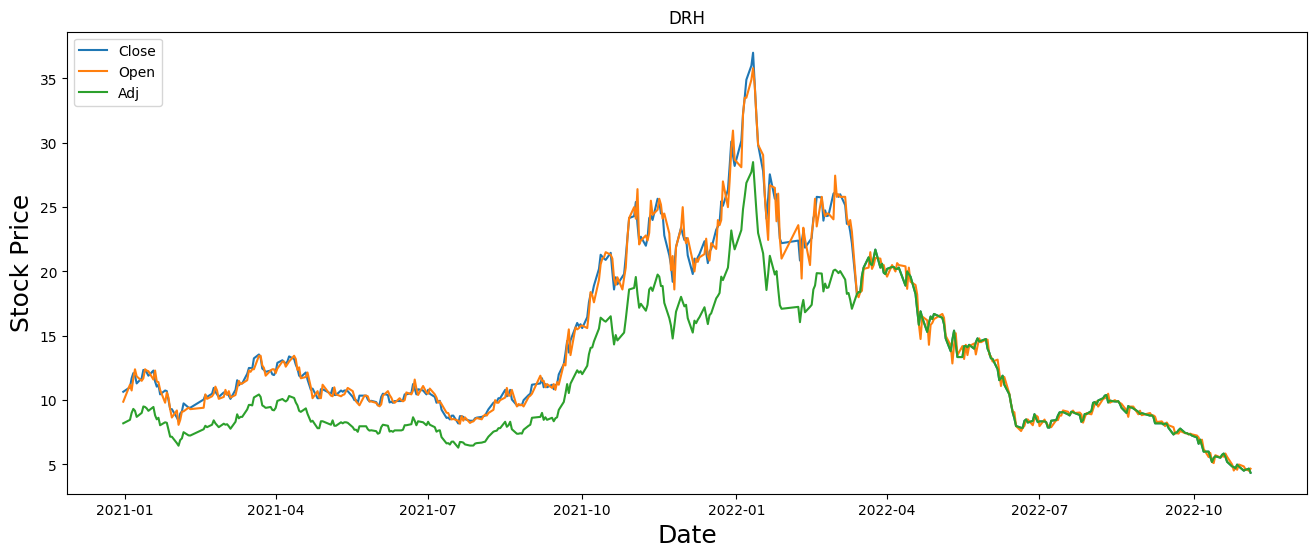

In [27]:
# Closing & Open & Adjustment
def draw_ColsingOpen(df):
  plt.figure(figsize=(16, 6)) # Kích thước biểu đồ đường
  plt.title(str(id))
  plt.plot(df[["price_closing", "price_open", "price_adjustment"]])
  plt.xlabel("Date", fontsize=18)
  plt.ylabel("Stock Price", fontsize=18)
  plt.legend(["Close", "Open", "Adj"], loc="upper left")
  plt.show()

draw_ColsingOpen(base_df)

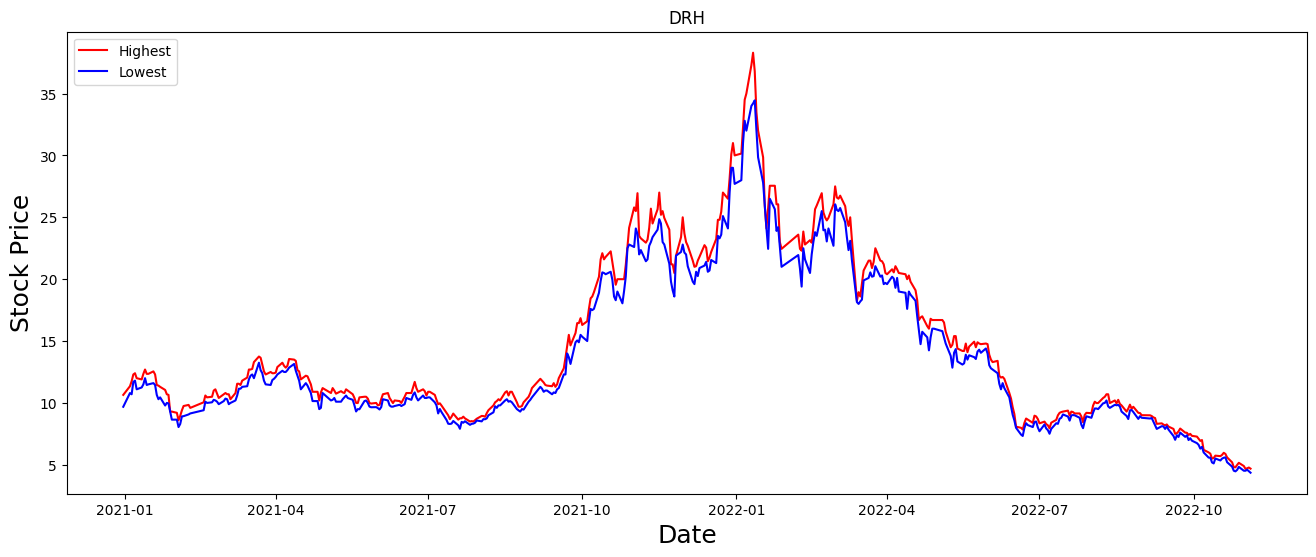

In [28]:
def draw_HighLow(df):
  # Highest & Lowest Price
  plt.figure(figsize=(16, 6)) # Kích thước biểu đồ đường
  plt.title(str(id))
  # plt.plot(df[["price_highest", "price_lowest"]])
  plt.plot(df['price_highest'], color='red', linewidth=1.5)
  plt.plot(df['price_lowest'], color='blue', linewidth=1.5)
  plt.xlabel("Date", fontsize=18)
  plt.ylabel("Stock Price", fontsize=18)
  plt.legend(["Highest", "Lowest"], loc="upper left")
  plt.show()

draw_HighLow(base_df)

In [29]:
# All 10 columns
def draw_10Cols(df, save_name=''):
  fig, ax = plt.subplots(2, 5, figsize=(14, 6))
  df.plot(y=["price_closing"], ax=ax[0][0])
  df.plot(y=["price_open"], ax=ax[0][1])
  df.plot(y=["price_adjustment"], ax=ax[0][2])
  df.plot(y=["rate_of_change"], ax=ax[0][3])
  df.plot(y=["gdkl_kl"], ax=ax[0][4])
  df.plot(y=["gdkl_gt"], ax=ax[1][0])
  df.plot(y=["gdtt_kl"], ax=ax[1][1])
  df.plot(y=["gdtt_gt"], ax=ax[1][2])
  df.plot(y=["price_highest"], ax=ax[1][3])
  df.plot(y=["price_lowest"], ax=ax[1][4])
  fig.tight_layout()
  if(save_name != ''):
    fig.suptitle(str(save_name), fontsize=14)
    plt.savefig(str(save_name)+'.png', bbox_inches='tight')
    plt.close()
  else:
    plt.show()

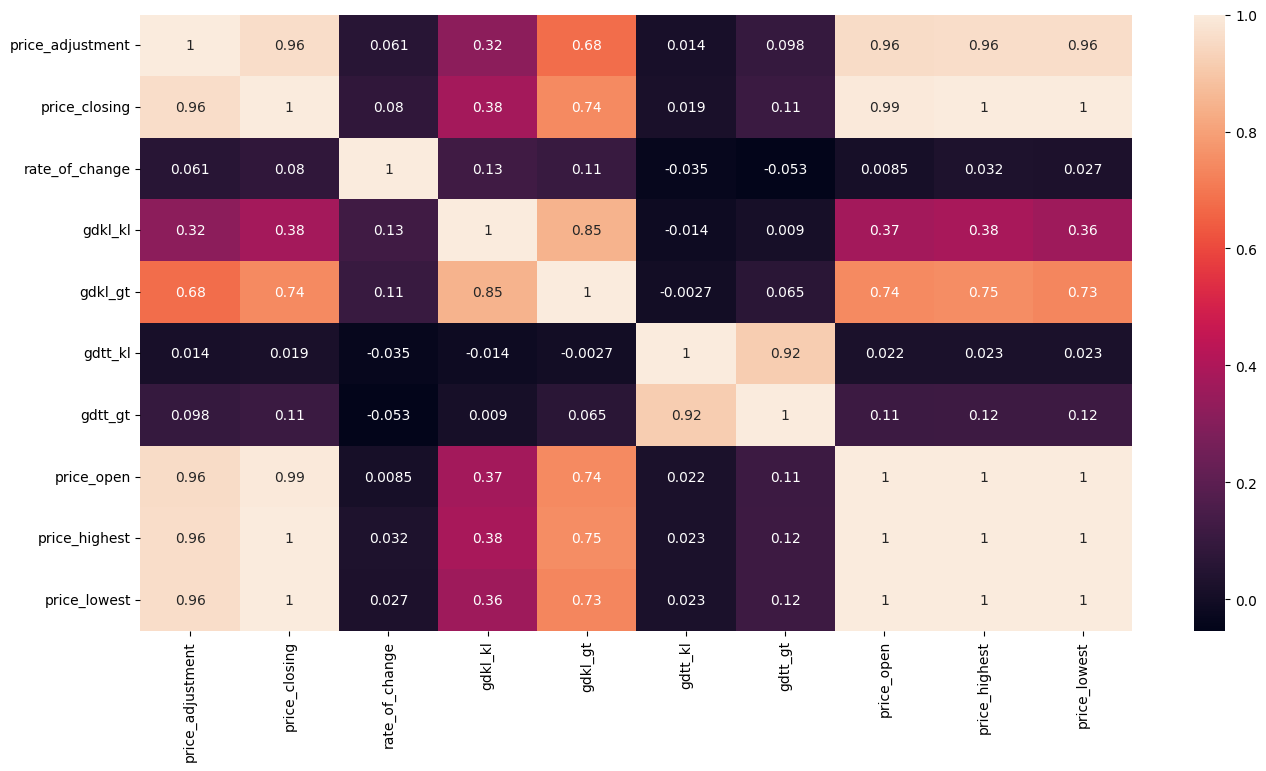

In [30]:
plt.figure(1 , figsize = (16 , 8))
cor = sns.heatmap(base_df.corr(), annot = True)

Màu càng nhạt thì độ correlated giữa các thuộc tính càng cao. Nhìn theo hình Heatmap miêu tả mối quan hệ Correlation giữa các cột thuộc tính thì ta sẽ thấy rằng giá đóng cửa, mở cửa, đóng cửa điều chỉnh, giá trần, giá sàn có correlated cao với nhau. Còn hai chỉ số chứng khoán con của giao dịch thỏa thuận lẫn giao dịch khớp lệnh có Correlated cực cao với nhau. Do đó, trong bài làm kiểu Univariate, hay dùng một feature để dự đoán một feature, thì tốt nhất là chúng ta chỉ nên sử dụng một trong bốn loại giá cơ bản, hoặc chỉ mình giá điều chỉnh, hoặc một trong hai loại của giao dịch thỏa thuận, hoặc một trong hai loại giao dịch khớp lệnh hoặc ROC để dự đoán giá chứng khoán trong việc giải quyết bài toán Time series Forecasting.

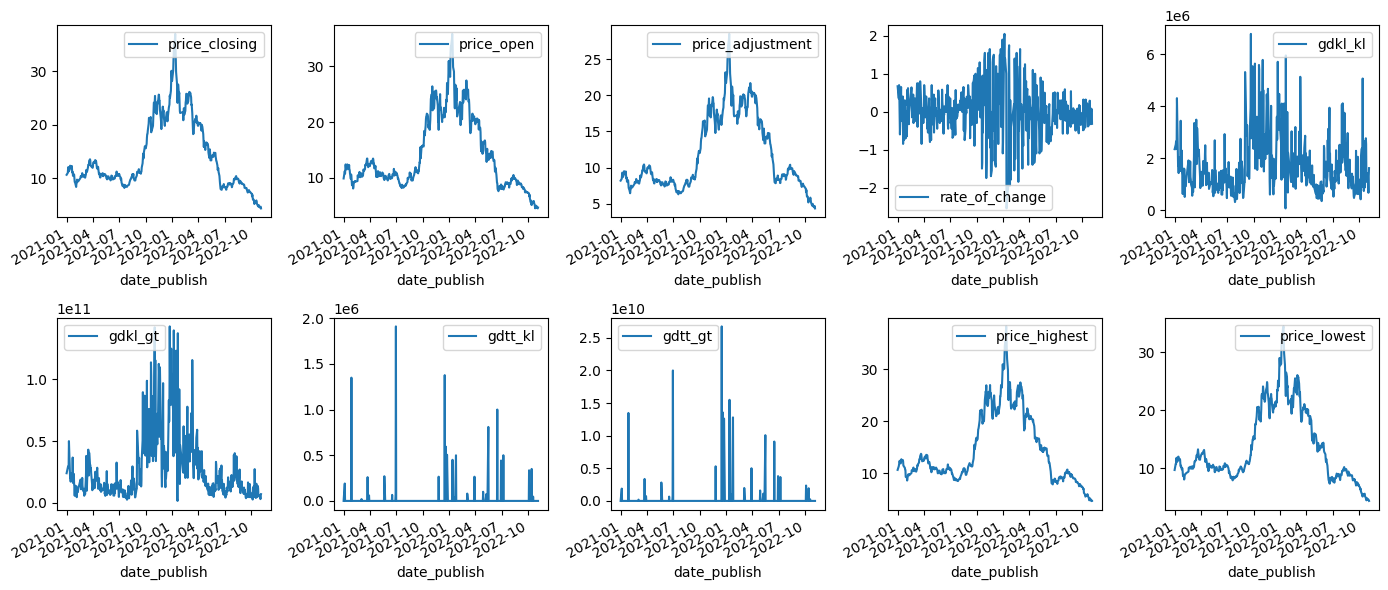

In [31]:
draw_10Cols(base_df)

Tuy vậy, khi nhìn vào hình nói về xu hướng tăng giảm thực tế qua từng tháng trước đó của 10 thuộc tính. Thì luận điểm vừa nói đến không còn chính xác nữa. Bởi chỉ có một trong bốn loại giá cơ bản và giá điều chỉnh là ổn định, liền mạch, máy có khả năng học. Hoặc là một trong hai loại của giao dịch khớp lệnh. Những thuộc tính như ROC và các giao dịch thỏa thuận tăng giảm quá bất thường để các mô hình tìm ra được công thức chung.

Với bài làm kiểu Multivariate, hay dùng nhiều feature để dự đoán nhiều feature. Nếu áp dụng kỹ thuật Feature Seletion, chúng ta có lẽ sẽ phải bỏ bớt các thuộc tính nằm trong cặp có độ correlated cao như price_open/price_closing, price_highest/price_lowest, gdkl_kl/gdkl_tt, gdtt_kl/gdtt_tt.

## 2.3 Xuất hình ứng với từng mã (cân nhắc trước khi chạy)

Mục đích của đoạn Code dưới đây là giúp người sử dụng có cái nhìn tổng quát về tất cả các mã sinh ra từ Dataset thô ở phần 1. Thông qua đồ thị, họ sẽ phát hiện một số mã phù hợp cho việc dự đoán, một số khác thì không.

Nếu như bạn không quan tâm hoặc chỉ muốn làm việc với 1 mã duy nhất đã chọn qua ở 2.1, vui lòng bỏ qua phần này. Bởi chạy nó rất tốn thời gian.

In [31]:
# Duyệt qua từng mã, xuất ảnh vẽ 10 cột thuộc tính của mã đó.
MACK = dtset.mack.unique()
for name in MACK:
  mack_df = pd.read_csv(str(name)+'.csv', index_col='date_publish', parse_dates=True, dayfirst=True)
  draw_10Cols(mack_df, name)

# **3. Tiền xử lý dữ liệu** (Dựa trên mã lấy từ 2.)

In [32]:
import numpy as np
import math

In [33]:
print("Vui lòng chọn một cột muốn dự đoán:")
for column in base_df.columns.tolist():
  print(column)
ChoosenCol = input("Mời bạn điền vào cột đã chọn: ")

Vui lòng chọn một cột muốn dự đoán:
price_adjustment
price_closing
rate_of_change
gdkl_kl
gdkl_gt
gdtt_kl
gdtt_gt
price_open
price_highest
price_lowest
Mời bạn điền vào cột đã chọn: price_adjustment


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Tạo một dataframe mới với chỉ cột đã chọn và index-column là Date:
# data = base_df.iloc[:, 1:2].values # Alternative.
data = base_df.filter([str(ChoosenCol)])
# Convert dataframe trên thành numpy array:
dataset = data.values
# Số lượng các dòng sẽ dùng để train model:
training_data_length = math.ceil(len(dataset)*0.85) # Lấy 85% để training

print(data[:5])
print("dataset =", dataset[:5])
print("training_data_length =", training_data_length)

              price_adjustment
date_publish                  
2020-12-31                8.20
2021-01-04                8.47
2021-01-05                9.01
2021-01-06                9.32
2021-01-07                9.17
dataset = [[8.2 ]
 [8.47]
 [9.01]
 [9.32]
 [9.17]]
training_data_length = 391


In [36]:
def scaling_data(dataset, min, max):
  # Preprocessing, Tiền xử lý dữ liệu (giúp model dễ chạy hơn) bằng cách Scale nó
  scaler = MinMaxScaler(feature_range=(min, max)) # MinMaxScaler object giúp
  scaled_data = scaler.fit_transform(dataset) # transfrom dữ liệu để chúng có giá trị trong khoảng [min, max], ví dụ: [0, 1]
  print(scaled_data[0:5])
  return scaled_data, scaler

scaled_data, scaler = scaling_data(dataset, 0, 1) # transfrom dữ liệu để chúng có giá trị trong khoảng [0, 1]

[[0.15907208]
 [0.17025684]
 [0.19262635]
 [0.2054681 ]
 [0.19925435]]


# **4. Tạo tập Train**

In [37]:
# Tạo TRAINING data set (đây là Scaled training data set)
train_data = scaled_data[0:training_data_length, :] # Lấy các giá trị có index từ 0 đến training_data_length, chọn tất cả cột.
# Tách train_data trên thành x_train và y_train data sets:
x_train = []
y_train = []

n = 63 # Theo tìm hiểu thì 1 năm có khoảng 252 ngày giao dịch <=> 1 tháng ~ 21.
# Append n ngày của quá khứ vào x_train data set:
for i in range(n, len(train_data)):
  # Ví dụ: tại cột số 0 của train_data, thực hiện:
  x_train.append(train_data[i-n:i, 0]) # x_train của vòng lập thứ nhất sẽ chứa n dữ liệu có index từ 0->(n-1).
  y_train.append(train_data[i, 0]) # y_train của vòng lập thứ nhất là giá trị tại vị trí index=n của train_data.
  # Sau mỗi vòng lập có trong lệnh for,
  # x_train dạng list sẽ có thêm một phần tử np array, mỗi phần tử này lại chứa n giá trị chứng khoán, ứng với n ngày quá khứ.
  # if i<=n:
  if i<=(n+1): # Giả sử n=63 (ngày), nghĩa là dùng 63 ngày quá khứ để dự đoán ngày thứ 64 tiếp theo, ví dụ:
    print(x_train)
    print(y_train)
    print("---")

[array([0.15907208, 0.17025684, 0.19262635, 0.2054681 , 0.19925435,
       0.17978459, 0.19262635, 0.21333886, 0.21168186, 0.2071251 ,
       0.19925435, 0.21168186, 0.18475559, 0.17191384, 0.17688484,
       0.15285833, 0.16238608, 0.16072908, 0.13835957, 0.11599006,
       0.11599006, 0.09527755, 0.08699254, 0.10521955, 0.11060481,
       0.13048882, 0.12013256, 0.11971831, 0.14001657, 0.15120133,
       0.14664457, 0.15451533, 0.16859983, 0.15907208, 0.15285833,
       0.14664457, 0.15782933, 0.15451533, 0.15617233, 0.14954432,
       0.14167357, 0.16404308, 0.18806959, 0.17522784, 0.17978459,
       0.17978459, 0.2038111 , 0.21830986, 0.21830986, 0.21665286,
       0.24233637, 0.25186413, 0.24399337, 0.21665286, 0.21333886,
       0.2087821 , 0.21168186, 0.2021541 , 0.20091135, 0.2087821 ,
       0.23115162, 0.23736537, 0.23280862])]
[0.22949461474730737]
---
[array([0.15907208, 0.17025684, 0.19262635, 0.2054681 , 0.19925435,
       0.17978459, 0.19262635, 0.21333886, 0.21168186, 0

In [38]:
# Trong đó:
print(n) # n = 63 (Ngày)
print(train_data[n-1]) # Ngày thứ 63 (do index bắt đầu từ 0)
print(train_data[n]) # Ngày thứ 64 (Ngày cần dự đoán)

63
[0.23280862]
[0.22949461]


In [39]:
# Convert x_train và y_train thành numpy array (để ta có thể dùng training cho các mô hình):
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
# Reshape data:
# Bởi một số mô hình như RNN, LSTM, Bidirectional mong đợi đầu vào phải là dữ liệu 3 chiều dưới dạng 
# (number of samples, number of time steps, number of features).
# Tuy nhiên, nãy giờ tập x_train chỉ là dữ liệu 2 chiều:
print("x_train gốc: ", x_train.shape) # Ví dụ
x_train_2dim = x_train # Lưu lại dữ liệu 2 chiều cho các mô hình nào cần nó.

# Xét thấy, number of samples=number of rows, number of time steps=number of colums và number of features=1 (là ChoosenCol) trong Univariate.
# Chúng ta thực hiện reshape từ (samples, timesteps) sang thành (samples, timesteps, features):
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("x_train đã reshape: ", x_train.shape) # 3 chiều
print("x_train 2 chiều: ", x_train_2dim.shape) # 2 chiều

x_train gốc:  (328, 63)
x_train đã reshape:  (328, 63, 1)
x_train 2 chiều:  (328, 63)


# **5. Tạo tập Test**

In [41]:
# Tạo TESTING data set
# Tạo mới một array (đã scale) chứa giá trị để tham chiếu cho việc tạo ra tập x_test:
test_data = scaled_data[training_data_length-n:, :] # Lấy tất cả column.
# Dùng 'training_data_length-n' thay vì 'training_data_length' là vì
# để dự đoán 15% dữ liệu còn lại từ dataset, thì tập test_data sẽ phải khởi đầu bằng
# n ngày trước đó (cần cho dự đoán) của index tại vị trí đầu tiên của 15% dữ liệu còn lại.

# Tạo x_test và y_test data sets:
x_test = []
y_test = dataset[training_data_length:, :] # Toàn giá trị mà chúng ta muốn mô hình của mình dự đoán được. Nhằm đánh giá model. Lưu ý, y_test không bị scale.
for i in range(n, len(test_data)): # Tương tự như lúc tạo tập x_train.
  x_test.append(test_data[i-n:i, 0])

In [42]:
# Convert data thành numpy array:
x_test = np.array(x_test) # Convert để dùng được cho các model.

In [43]:
# Reshape data:
print(x_test.shape) # Ban đầu có 2 chiều.
x_test_2dim = x_test # Lưu lại dữ liệu 2 chiều cho các mô hình nào cần nó.

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape) # 3 chiều

(69, 63)
(69, 63, 1)


# **6. Huấn luyện mô hình với tập Train**

In [44]:
# Importing te Kreas Libraries and Package:
from keras.models import Sequential # Để khởi tạo model
from keras.layers import Dense # Để thêm layer cho model
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dropout
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import accuracy_score

## Các hàm cơ bản

In [46]:
def make_pred(Model, x_test, twoDimension=False):
  # Dùng ModelName để dự đoán giá ChoosenCol dựa trên dữ liệu đầu vào đã scale.
  # Do chúng ta cần biến predictions (hay y_pred) phải chứa cùng giá trị với y_test (mà dữ liệu trong y_test lại không có bị scale):
  predictions = Model.predict(x_test)
  if(twoDimension == True):
    predictions = scaler.inverse_transform(predictions.reshape(-1,1)) # UnScaling các giá trị.
    # print("[==============================]")
  else:
    predictions = scaler.inverse_transform(predictions) # UnScaling các giá trị.
  return predictions

In [47]:
# Evaluation metrices RMSE, MSE and MAE:
def make_evaluation(ModelName, prediction, actual):
    print(str(ModelName) + " RMSE: ", mean_squared_error(actual, prediction, squared=False)) # RMSE thấp thì fit tốt và ngược lại. Bằng 0 tức là chính xác đến hoàn hảo.
    print(str(ModelName) + " MSE: ", mean_squared_error(actual, prediction))
    print(str(ModelName) + " MAE: ", mean_absolute_error(actual, prediction))

Root Mean Square Error (RMSE), Mean Square Error (MSE) và Mean Absolute Error (MAE) là những cách cơ bản để đo lường error của một mô hình trong việc đưa ra dự đoán.

## 6.1 MLP

In [48]:
# Build mô hình:
MLP_model = Sequential()
MLP_model.add(Dense(32, activation='relu')) # Univariate MPL model mong đợi đầu vào có dạng (samples, features).
# Tuy nhiên, thực tế thì MPL model vẫn sẽ xem mỗi time step như là một feature riêng lẻ. 
# Nói cách khác, (number of samples, number of time steps) của x_train lúc chưa reshape (bây giờ là x_train_2dim) vẫn sử dụng được cho trường hợp này.
MLP_model.add(Dropout(0.1)) # Ý tưởng giảm Overfitting là giả sử hidden layer có 20 neuron thì 0.2, tức 20%, tức 4/20 ngẫu nhiên sẽ không được căn nhắc khi đưa ra dự đoán.
MLP_model.add(Dense(16, activation='relu'))
MLP_model.add(Dropout(0.1))
MLP_model.add(Dense(1))

In [49]:
# Completing mô hình:
MLP_model.compile(optimizer="adam", loss="mean_squared_error")

In [50]:
# Train mô hình:
MLP_model.fit(x_train_2dim, y_train, epochs=5, batch_size=32, verbose=0)

In [51]:
MLP_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2048      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________


## 6.2 RNN

In [52]:
# Build mô hình:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units = 50, return_sequences=True, input_shape=(x_train.shape[1],  x_train.shape[2]) )) # input_shape=(number of time steps, number of features)
RNN_model.add(Dropout(0.2)) # Để giảm Overfitting.
RNN_model.add(SimpleRNN(units = 97, return_sequences=True))
RNN_model.add(Dropout(0.3))
RNN_model.add(SimpleRNN(units = 50, return_sequences=False))
RNN_model.add(Dropout(0.1))
# Thêm vào output layer:
RNN_model.add(Dense(units=1))

In [53]:
# Completing mô hình:
RNN_model.compile(optimizer="adam", loss="mean_squared_error")

In [54]:
# Train mô hình:
RNN_model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)

In [55]:
RNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 63, 50)            2600      
                                                                 
 dropout_2 (Dropout)         (None, 63, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 63, 97)            14356     
                                                                 
 dropout_3 (Dropout)         (None, 63, 97)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50)                7400      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

## 6.3 LSTM

In [56]:
# Build mô hình:
LSTM_model = Sequential()
# Thêm LSTM layer với 50 neurons và chọn return=True, bởi cần dùng thêm một LSTM layer nữa; 
LSTM_model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) # input_shape=(number of time steps, number of features)
# Do có nhiều dữ liệu nên thực tế, dữ liệu đầu vào sẽ có dạng (samples, timesteps, features).
LSTM_model.add(Dropout(0.1)) # Để giảm Overfitting.
LSTM_model.add(LSTM(units = 50, return_sequences=True)) # Tương tự, return=True.
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(units = 50, return_sequences=False))
LSTM_model.add(Dropout(0.1))
LSTM_model.add(Dense(25)) # 25 neurons
LSTM_model.add(Dropout(0.1))
LSTM_model.add(Dense(1)) # 1 neurons

In [57]:
# Completing mô hình
LSTM_model.compile(optimizer="adam", loss="mean_squared_error")

In [58]:
# Train mô hình
LSTM_model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0) 

In [59]:
LSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 63, 50)            10400     
                                                                 
 dropout_5 (Dropout)         (None, 63, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 63, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 63, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 25)               

## 6.4 Bidirectional

In [60]:
# Build mô hình:
Bidirec_model = Sequential()
Bidirec_model.add(Bidirectional(LSTM(units = 50, activation='relu', return_sequences=True, input_shape =(x_train.shape[1], x_train.shape[2]) ))) # đầu vào tương tự LSTM
LSTM_model.add(Dropout(0.1)) # Để giảm Overfitting.
Bidirec_model.add(Bidirectional(LSTM(units = 50, activation='relu', return_sequences=True)))
LSTM_model.add(Dropout(0.2))
Bidirec_model.add(Bidirectional(LSTM(units = 50, activation='relu', return_sequences=False)))
LSTM_model.add(Dropout(0.1))
# Thêm vào output layer:
Bidirec_model.add(Dense(units=1))

In [61]:
# Completing mô hình:
Bidirec_model.compile(optimizer="adam", loss="mean_squared_error")
Bidirec_model.build(x_train.shape)

In [62]:
# Train mô hình:
Bidirec_model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)

In [63]:
Bidirec_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 63, 100)          20800     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 63, 100)          60400     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 141,701
Trainable params: 141,701
Non-trainable params: 0
________________________________________________

## 6.5 Super Vector Regression (SVR)

In [64]:
SVR_model = SVR(kernel='rbf', C=1e2, gamma=0.1)
SVR_model.fit(x_train_2dim, y_train) # Đầu vào có dạng (number of samples, number of time steps)

SVR(C=100.0, gamma=0.1)

## 6.6 K-nearest neighbour

In [65]:
K = n # k = Number of time steps
KNN_model = neighbors.KNeighborsRegressor(n_neighbors = K)
KNN_model.fit(x_train_2dim, y_train)

KNeighborsRegressor(n_neighbors=63)

In [66]:
# KNN_train_predictions = KNN_model.predict(x_train_2dim) # For train reference only.
# KNN_test_predictions = KNN_model.predict(x_test_2dim) # Original.
# predictions = KNN_model.predict(x_test_2dim) # Alternative.

In [67]:
# KNN_train_predictions = scaler.inverse_transform(KNN_train_predictions.reshape(-1,1)) # For train reference only.
# KNN_test_predictions = scaler.inverse_transform(KNN_test_predictions.reshape(-1,1)) # Original.
# predictions = scaler.inverse_transform(predictions.reshape(-1,1)) # Alternative.

## 6.7 Random Forest Regressor

In [68]:
RFR_model = RandomForestRegressor(n_estimators=100, random_state=0)
RFR_model.fit(x_train_2dim, y_train)

RandomForestRegressor(random_state=0)

# **7. Đưa ra dự đoán trên tập Test**

In [69]:
MLP_y_pred = make_pred(MLP_model, x_test)
make_evaluation("MLP", MLP_y_pred, y_test)

RNN_y_pred = make_pred(RNN_model, x_test)
make_evaluation("RNN", RNN_y_pred, y_test)

LSTM_y_pred = make_pred(LSTM_model, x_test)
make_evaluation("LSTM", LSTM_y_pred, y_test)

Bidirec_y_pred = make_pred(Bidirec_model, x_test)
make_evaluation("Bidirectional", Bidirec_y_pred, y_test)

SVR_y_pred = make_pred(SVR_model, x_test_2dim, True)
make_evaluation("SVR", SVR_y_pred, y_test)

KNN_y_pred = make_pred(KNN_model, x_test_2dim, True)
make_evaluation("KNN", KNN_y_pred, y_test)

RFR_y_pred = make_pred(RFR_model, x_test_2dim, True)
make_evaluation("RFR", RFR_y_pred, y_test)

3/3 [==============================] - 0s 6ms/step
MLP RMSE:  2.164033019344121
MLP MSE:  4.683038908811632
MLP MAE:  1.9976368354023362
3/3 [==============================] - 0s 8ms/step
RNN RMSE:  2.4557987156856713
RNN MSE:  6.030947331963392
RNN MAE:  2.068527103921641
3/3 [==============================] - 1s 13ms/step
LSTM RMSE:  1.2081693844250891
LSTM MSE:  1.459673261462099
LSTM MAE:  1.1000473713529286
3/3 [==============================] - 1s 21ms/step
Bidirectional RMSE:  1.4144683328069667
Bidirectional MSE:  2.00072066451372
Bidirectional MAE:  1.2200124160103178
SVR RMSE:  1.735093849523463
SVR MSE:  3.010550666654149
SVR MAE:  1.5196082364534975
KNN RMSE:  1.617832600246094
KNN MSE:  2.6173823224190382
KNN MAE:  1.3591488382792734
RFR RMSE:  0.9263728644870662
RFR MSE:  0.8581666840579725
RFR MAE:  0.6500521739130443


In [70]:
actual = data[0:]
test_df = data[training_data_length:]
test_df["MLP_pred"] = MLP_y_pred
test_df["RNN_pred"] = RNN_y_pred
test_df["LSTM_pred"] = LSTM_y_pred
test_df["Bidirec_pred"] = Bidirec_y_pred
test_df["SVR_pred"] = SVR_y_pred
test_df["KNN_pred"] = KNN_y_pred
test_df["RFR_pred"] = RFR_y_pred

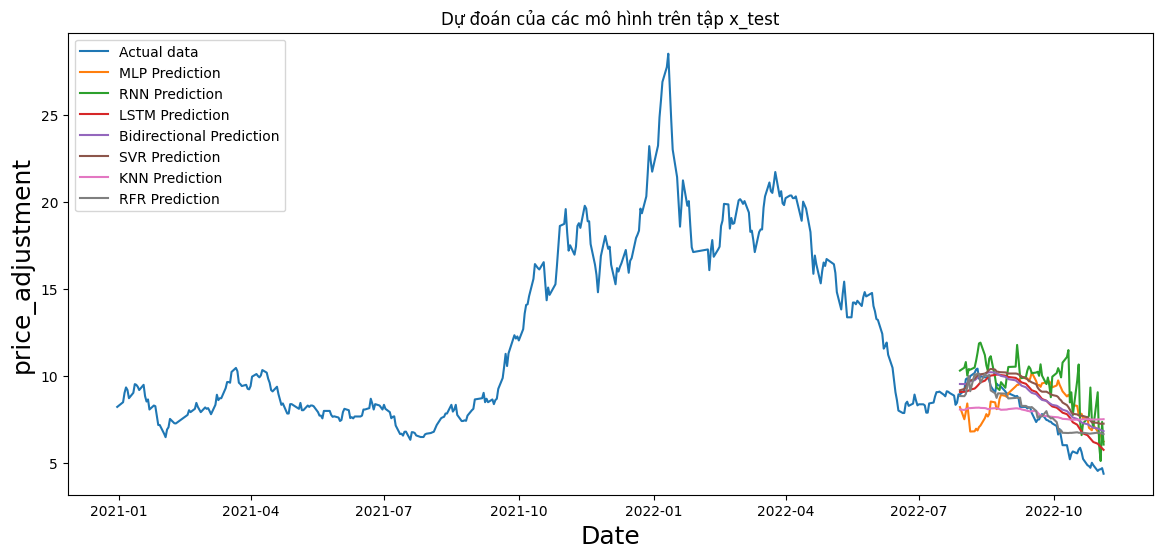

In [71]:
# Vẽ biểu đồ đường có dự đoán từ model
plt.figure(figsize=(14,6)) # Kích thước biểu đồ đường
plt.title("Dự đoán của các mô hình trên tập x_test")
plt.xlabel("Date", fontsize=18)
plt.ylabel(str(ChoosenCol), fontsize=18)
plt.plot(actual[str(ChoosenCol)])
plt.plot(test_df[["MLP_pred", "RNN_pred", "LSTM_pred", "Bidirec_pred", "SVR_pred", "KNN_pred", "RFR_pred"]])
plt.legend(["Actual data", "MLP Prediction", "RNN Prediction", "LSTM Prediction", "Bidirectional Prediction", "SVR Prediction", "KNN Prediction", "RFR Prediction"], loc="upper left")
plt.show()
# Nếu dữ liệu chứng khoán được xử lý phù hợp, dự đoán mô hình đưa ra sẽ rất tốt,
# Bởi vì chúng ta đang dùng n ngày quá khứ luôn đúng khi huấn luyện nó.
# Thực tế thì không thể có n ngày quá khứ luôn đúng như vậy, nhất là khi dự đoán tương lai xa.
# Do chúng ta sẽ cần phải lấy ngày A đã được dự đoán xong để dự đoán tiếp ngày B, rồi ngày A và B để dự đoán tiếp ngày C, ... 
# Việc này được hiện thực ở phần 8. bên dưới.

In [72]:
# Actual vs Predicted price:
test_df.head(10)

price_adjustment  MLP_pred   RNN_pred  LSTM_pred  Bidirec_pred  \
date_publish                                                                   
2022-07-29                8.92  8.189735  10.287487   9.055490      9.517141   
2022-08-01                9.15  7.491189  10.457883   9.070224      9.512324   
2022-08-02                9.79  7.901853  10.779741   9.084743      9.519213   
2022-08-03                9.85  8.397284   9.997190   9.108073      9.558479   
2022-08-04                9.66  7.602235  10.375237   9.144659      9.613731   
2022-08-05                9.97  6.785284  10.341385   9.193184      9.669265   
2022-08-08               10.15  6.797623  10.462613   9.254278      9.733543   
2022-08-09               10.35  6.945680  10.846804   9.328118      9.804149   
2022-08-10               10.40  6.846968  11.309414   9.414722      9.889973   
2022-08-11                9.82  7.041478  11.849293   9.512311      9.981904   

               SVR_pred  KNN_pred  RFR_pred  
date_publish                                 
2022-07-29     9.157545  8.051905    8.8252  
2022-08-01     9.230722  8.020635    8.8181  
2022-08-02     9.342610  8.072540    8.9371  
2022-08-03     9.536757  8.093651    9.3547  
2022-08-04     9.684315  8.130159    9.9772  
2022-08-05     9.715905  8.130635    9.0997  
2022-08-08     9.799237  8.148730   10.0778  
2022-08-09     9.920850  8.155238   10.0364  
2022-08-10    10.013337  8.155238   10.1283  
2022-08-11    10.089944  8.160159   10.1024

# **8. Dự đoán từ các mô hình sẵn có**

In [73]:
import datetime as dt

## 8.1 - Lấy ngày trung thực

In [74]:
# Lấy ngày theo kiểu trung thực:
# Dựa vào Timedelta của Pandas mà lấy 7 tuần trước đó, tính từ thời điểm selected:
# Lưu ý: Chúng ta chỉ lấy đúng tuần (có ngày mở, có ngày không) chứ không lấy đúng số dòng (1 dòng = 1 ngày).
selected = '2022-10-31' # chuỗi string chung chung như này vẫn đúng, không cần chính xác là ngày phải có trong dataset.
W7_df = base_df[(pd.to_datetime(selected)-pd.Timedelta(weeks=7)) : selected] # Theo lý thì là như này,
print(W7_df.index[0])
print(W7_df.index[len(W7_df)-1])
print(W7_df.shape)
print('Lưu ý: Lệnh Timedelta chỉ lấy đúng 7 Week =', pd.Timedelta(weeks=7))
print("---")

# Nhưng do chúng ta lấy n ngày quá khứ để dự đoán một ngày tương lai nên cần cộng thêm n:
Week7_EndDay = base_df.index.get_loc(W7_df.index[len(W7_df)-1]) # Vị trí cuối của Dataset mới tạo trên kia có index (integer) value là?
Week7_EndDay = Week7_EndDay + 1 # Cần cộng index thêm 1 do thuật toán duyệt sẽ dừng trước khi chạm chặn cuối.
Week7_StartDay = (Week7_EndDay - W7_df.shape[0]) - n
W7_df = base_df[Week7_StartDay : Week7_EndDay]
print(W7_df.index[0])
print(W7_df.index[len(W7_df)-1])
print(W7_df.shape)

# Trong đó: 
# new_df.index[0] = giá trị datetime tại dòng đầu tiên của new_df dataset.
# new_df.index[len(new_df)-1] = giá trị datetime tại dòng cuối cùng của new_df dataset.

2022-09-12 00:00:00
2022-10-31 00:00:00
(36, 10)
Lưu ý: Lệnh Timedelta chỉ lấy đúng 7 Week = 49 days 00:00:00
---
2022-06-13 00:00:00
2022-10-31 00:00:00
(99, 10)


7 tuần bằng 49 ngày, nhưng do có ngày mở, ngày không nên thực tế thì chỉ có <49 dòng dữ liệu. Còn để dự đoán cần bắt buộc đúng n ngày quá khứ, nên chúng ta phải lấy khúc này là n dòng dữ liệu.

In [75]:
# Tương tự, ta sẽ kiếm được Index (int) của ngày bắt đầu và ngày kết thúc của 2 tuần tại dataset gốc bằng cách:
Week2_StartDay = Week7_StartDay # Vị trí index tại Dataset gốc mà n ngày quá khứ + ngày đầu tiên trong 2 tuần bắt đầu.
selected2 = base_df.index[Week2_StartDay + n] + pd.Timedelta(weeks=2) # Ngày cuối cùng trong 2 tuần (chỉ phỏng đoán thôi, do có ngày làm việc, có ngày không).
# (Week2_StartDay + n) mới là ngày đầu tiên trong 2 tuần, và là ngày đầu tiên chúng ta cần đưa ra dự đoán dựa trên n ngày quá khứ trước nó.
print("Ngày bắt đầu của 2 tuần: ", base_df.index[Week2_StartDay + n])
print("Phỏng đoán ngày cuối sau 2 tuần nữa: ", selected2)

W2_df = base_df[base_df.index[Week2_StartDay] : selected2] # (n ngày + 2 tuần) thực chất là bao gồm những dòng dữ liệu nào?
Week2_EndDay = base_df.index.get_loc(W2_df.index[len(W2_df)-1]) # Ngày cuối cùng trong thực tế.

print("Nhưng thực tế thì chỉ có", int(W2_df.shape[0])-n, "ngày là có giao dịch mà thôi.")
print("Và chúng cũng không được xuyên suốt, liền mạch.")
print(W2_df.index[0], "có Index =", 0, "| Index(int) tại Dataset gốc =", Week2_StartDay) # Đã cộng n ngày dự đoán vào rồi.
print(W2_df.index[len(W2_df)-1], "có Index =", len(W2_df-1), "| Index(int) tại Dataset gốc =", Week2_EndDay)

Ngày bắt đầu của 2 tuần:  2022-09-12 00:00:00
Phỏng đoán ngày cuối sau 2 tuần nữa:  2022-09-26 00:00:00
Nhưng thực tế thì chỉ có 11 ngày là có giao dịch mà thôi.
Và chúng cũng không được xuyên suốt, liền mạch.
2022-06-13 00:00:00 có Index = 0 | Index(int) tại Dataset gốc = 357
2022-09-26 00:00:00 có Index = 74 | Index(int) tại Dataset gốc = 430


In [76]:
base_df.iloc[Week2_EndDay]

price_adjustment    7.450000e+00
price_closing       7.450000e+00
rate_of_change     -3.500000e-01
gdkl_kl             2.057500e+06
gdkl_gt             1.530100e+10
gdtt_kl             0.000000e+00
gdtt_gt             0.000000e+00
price_open          7.430000e+00
price_highest       7.600000e+00
price_lowest        7.260000e+00
Name: 2022-09-26 00:00:00, dtype: float64

## 8.2 Xem lại Dataset

Sau khi chạy phần 8.1 trên. Chúng ta sẽ có được biến `Week7_StartDay` là index mà 63 ngày + ngày đầu tiên trong 7 tuần bắt đầu. `Week7_EndDay-1` là index mà ngày cuối cùng của 7 tuần tọa lạc.

In [77]:
print(W7_df.index[0], "có Index =", 0, "| Index(int) tại Dataset gốc =", Week7_StartDay)
print(W7_df.index[len(W7_df)-1], "có Index =", len(W7_df-1), "| Index(int) tại Dataset gốc =", Week7_EndDay-1)

2022-06-13 00:00:00 có Index = 0 | Index(int) tại Dataset gốc = 357
2022-10-31 00:00:00 có Index = 99 | Index(int) tại Dataset gốc = 455


In [78]:
base_df.iloc[Week7_StartDay]

price_adjustment    1.045000e+01
price_closing       1.045000e+01
rate_of_change     -7.500000e-01
gdkl_kl             1.312000e+06
gdkl_gt             1.376300e+10
gdtt_kl             0.000000e+00
gdtt_gt             0.000000e+00
price_open          1.050000e+01
price_highest       1.080000e+01
price_lowest        1.045000e+01
Name: 2022-06-13 00:00:00, dtype: float64

In [79]:
base_df.iloc[Week7_EndDay-1]

price_adjustment    4.520000e+00
price_closing       4.520000e+00
rate_of_change     -3.300000e-01
gdkl_kl             1.422500e+06
gdkl_gt             6.518000e+09
gdtt_kl             0.000000e+00
gdtt_gt             0.000000e+00
price_open          4.850000e+00
price_highest       4.900000e+00
price_lowest        4.520000e+00
Name: 2022-10-31 00:00:00, dtype: float64

In [80]:
W7_df.head(1)

price_adjustment  price_closing  rate_of_change    gdkl_kl  \
date_publish                                                               
2022-06-13               10.45          10.45           -0.75  1312000.0   

                   gdkl_gt  gdtt_kl  gdtt_gt  price_open  price_highest  \
date_publish                                                              
2022-06-13    1.376300e+10      0.0      0.0        10.5           10.8   

              price_lowest  
date_publish                
2022-06-13           10.45

In [81]:
W7_df.tail(1)

price_adjustment  price_closing  rate_of_change    gdkl_kl  \
date_publish                                                               
2022-10-31                4.52           4.52           -0.33  1422500.0   

                   gdkl_gt  gdtt_kl  gdtt_gt  price_open  price_highest  \
date_publish                                                              
2022-10-31    6.518000e+09      0.0      0.0        4.85            4.9   

              price_lowest  
date_publish                
2022-10-31            4.52

## 8.3 Chạy Dự đoán

In [82]:
data = base_df.filter([str(ChoosenCol)])
print(data.shape)
run_dataset = data.values
print(run_dataset[:5])
# Tiền xử lý dữ liệu:
scaled_run_data, scaler = scaling_data(run_dataset, 0, 1) # transfrom dữ liệu để chúng có giá trị trong khoảng [0, 1]

(460, 1)
[[8.2 ]
 [8.47]
 [9.01]
 [9.32]
 [9.17]]
[[0.15907208]
 [0.17025684]
 [0.19262635]
 [0.2054681 ]
 [0.19925435]]


In [83]:
# Hàm tóm tắt đưa từng X_test[0], X_test[1], ... X_test[run_data_MaxLength] vào Model,
# Để nhận về kết quả dự đoán (input đã scale và output vẫn còn scale)
def X_test_toModel(X_test, model, twoDimension=False):
  X_test = np.array(X_test) # Convert X_test từ dạng list sang thành numpy array.
  if(twoDimension != True): # Nếu đưa vào mô hình cần 3 chiều thì:
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # Reshape data thành 3 chiều.
    pred_price = model.predict(X_test) # Dùng model để dự đoán ChoosenCol (X_test đang bị scale)
    return pred_price
  else:
    X_test_2dim = X_test # X_test đang là dữ liệu 2 chiều.
    pred_price = model.predict(X_test_2dim) # Dùng model để dự đoán ChoosenCol (X_test đang bị scale)
    pred_price = [pred_price]
    return pred_price

In [84]:
def UnScaling_data(predictions, twoDimension=False):
  if(twoDimension == True):
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1)) # UnScaling các giá trị 2 chiều.
  else:
    predictions = scaler.inverse_transform(predictions) # UnScaling các giá trị 3 chiều.
  return predictions

def show_me_Run_data_length(run_data_MaxLength, run_data, run_data_unscale):
  # Nếu độ dài run_data (có chứa các ngày mà mô hình dự đoán được) cao hơn độ dài tối đa cho phép,
  print("run_data_MaxLength - run_data = ", run_data_MaxLength - len(run_data)) # thì tức là phi logic, làm sai rồi.
  print("run_data_MaxLength = ", run_data_MaxLength) # Có cộng thêm n ngày quá khứ.
  print("run_data_unscale = ", len(run_data_unscale)) # Thực tế, dự đoán được bao nhiêu đây dòng dữ liệu.

In [85]:
# Hàm chạy để khởi tạo và hoàn thiện tập X_test, thông qua đó hoàn thiện run_data.
# Việc dự đoán ngày mai ra sao phụ thuộc vào việc là input là Model nào. 
# twoDimension có giá trị hoặc là True hoặc là False, bởi tùy mô hình mà input shape là 2 hoặc 3 chiều.
def make_X_test(run_data_MaxLength, run_data, Model, twoDimension):
  count = 0
  X_test = []
  for i in range(n, run_data_MaxLength):
    X_test.append(run_data[i-n:i, 0]) # Từng Index một của X_test sẽ chỉ chứa đủ n ngày quá khứ cần để dự đoán 1 ngày tương lai.
    pred_price = X_test_toModel([X_test[count]], Model, twoDimension) # Lấy đúng n ngày quá khứ gần nhất để dự đoán ngày mai, lưu lại kết quả dự đoán 1 ngày đó vào pred_price.
    run_data = np.concatenate((run_data, pred_price)) # Cập nhật ngày dự đoán vừa tìm được vào Data đang duyệt để có thể dùng nó mà tiếp tục dự đoán ngày hôm sau.
    count += 1 # Đảm bảo rằng tại một vòng lập, thì chỉ lấy đúng n ngày để dự đoán 1 ngày. Giúp định vị xem rằng đang dùng tới Index nào của X_test.
  
  # Bỏ scale để vẽ biểu đồ:
  run_data_unscale = UnScaling_data(run_data, twoDimension) 
  run_data_unscale = run_data_unscale[n:run_data_MaxLength] # Bỏ n ngày quá khứ để dự đoán ngày đầu tiên. n ngày này là dữ liệu chắc đúng.
  return run_data, run_data_unscale # do lấy ngày dự đoán được để dự đoán ngày mai tiếp, nên chúng ta lấy luôn Data, không cần X_test nữa.

# Tạo RUN data set:
run_data_MaxLength = len(scaled_run_data[Week7_StartDay:Week7_EndDay, :]) # Độ dài tối đa mà run_data có thể có.
run_data = scaled_run_data[Week7_StartDay:Week7_StartDay+n, :] # Biến run_data ban đầu chỉ chứa n ngày trước ngày đầu tiên trong 7 tuần dữ liệu.

In [86]:
# Lấy dữ liệu thực tế để so sánh, đối chiếu:
actual = data[Week7_StartDay+n : Week7_EndDay] 
# Do make_evaluation() cần cả y_pred và y_test đều cùng kiểu numpy array nên cần convert actual sang numpy array.

In [87]:
MLP_RunData, MLP_RunData_Unscale = make_X_test(run_data_MaxLength, run_data, MLP_model, False)
make_evaluation("MLP", MLP_RunData_Unscale, np.array(actual))

RNN_RunData, RNN_RunData_Unscale = make_X_test(run_data_MaxLength, run_data, RNN_model, False)
make_evaluation("RNN", RNN_RunData_Unscale, np.array(actual))

LSTM_RunData, LSTM_RunData_Unscale = make_X_test(run_data_MaxLength, run_data, LSTM_model, False)
make_evaluation("LSTM", LSTM_RunData_Unscale, np.array(actual))

Bidirec_RunData, Bidirec_RunData_Unscale = make_X_test(run_data_MaxLength, run_data, Bidirec_model, False)
make_evaluation("Bidirectional", Bidirec_RunData_Unscale, np.array(actual))

SVR_RunData, SVR_RunData_Unscale = make_X_test(run_data_MaxLength, run_data, SVR_model, True)
make_evaluation("SVR", SVR_RunData_Unscale, np.array(actual))

KNN_RunData, KNN_RunData_Unscale = make_X_test(run_data_MaxLength, run_data, KNN_model, True)
make_evaluation("KNN", KNN_RunData_Unscale, np.array(actual))

RFR_RunData, RFR_RunData_Unscale = make_X_test(run_data_MaxLength, run_data, RFR_model, True)
make_evaluation("RFR", RFR_RunData_Unscale, np.array(actual))

1/1 [==============================] - 0s 8ms/step
MLP RMSE:  3.9471409330068647
MLP MSE:  15.579921545018301
MLP MAE:  3.7318841272013055
1/1 [==============================] - 0s 9ms/step
RNN RMSE:  12.582323995072784
RNN MSE:  158.31487711698435
RNN MAE:  11.797772342943482
1/1 [==============================] - 0s 22ms/step
LSTM RMSE:  3.4751818192982924
LSTM MSE:  12.076888677181389
LSTM MAE:  3.1784229328897267
1/1 [==============================] - 0s 23ms/step
Bidirectional RMSE:  3.3656215825670275
Bidirectional MSE:  11.327408637040984
Bidirectional MAE:  3.0691811089631584
SVR RMSE:  6.126698477561697
SVR MSE:  37.536434234956815
SVR MAE:  5.636204264245382
KNN RMSE:  1.5575883325173712
KNN MSE:  2.426081413594245
KNN MAE:  1.2210185185185185
RFR RMSE:  1.995627759906921
RFR MSE:  3.9825301561111153
RFR MAE:  1.6365000000000007


In [88]:
show_me_Run_data_length(run_data_MaxLength, MLP_RunData, MLP_RunData_Unscale)
print("Acutal Length = ", len(np.array(actual)))

run_data_MaxLength - run_data =  0
run_data_MaxLength =  99
run_data_unscale =  36
Acutal Length =  36


## 8.4 Vẽ hình

### 8.4.1 Bảy tuần sau

In [89]:
# Vẽ biểu đồ đường có dự đoán từ model
predict_7Week = data[Week7_StartDay+n:Week7_EndDay]
predict_7Week["MLP_pred"] = MLP_RunData_Unscale
predict_7Week["RNN_pred"] = RNN_RunData_Unscale
predict_7Week["LSTM_pred"] = LSTM_RunData_Unscale
predict_7Week["Bidirec_pred"] = Bidirec_RunData_Unscale
predict_7Week["SVR_pred"] = SVR_RunData_Unscale
predict_7Week["KNN_pred"] = KNN_RunData_Unscale
predict_7Week["RFR_pred"] = RFR_RunData_Unscale

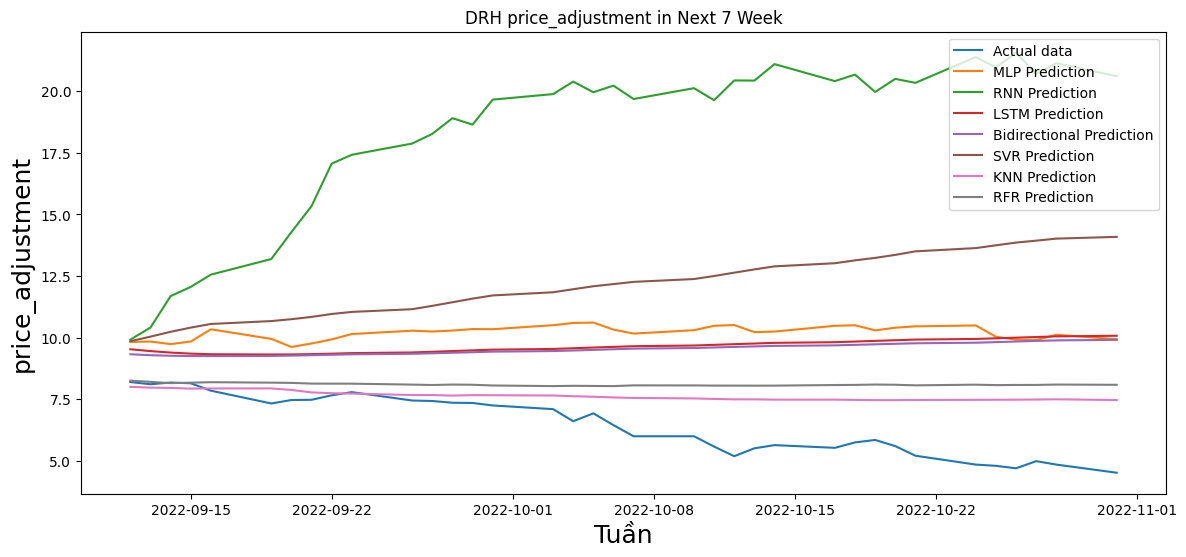

In [90]:
def plot_Next7Week(actual, predict_7Week):
  plt.figure(figsize=(14, 6)) # Kích thước biểu đồ đường
  plt.title(id + " " + str(ChoosenCol)+ " in Next 7 Week")
  plt.xlabel("Tuần", fontsize=18)
  plt.ylabel(str(ChoosenCol), fontsize=18)
  plt.plot(actual[str(ChoosenCol)]) # Giá trị thực
  plt.plot(predict_7Week[["MLP_pred", "RNN_pred", "LSTM_pred", "Bidirec_pred", "SVR_pred", "KNN_pred", "RFR_pred"]]) # Giá trị dự đoán
  plt.legend(["Actual data", "MLP Prediction", "RNN Prediction", "LSTM Prediction", "Bidirectional Prediction", "SVR Prediction", "KNN Prediction", "RFR Prediction"], loc="upper right")
  plt.show()

plot_Next7Week(actual, predict_7Week)

In [91]:
predict_7Week.head(4)

price_adjustment  MLP_pred   RNN_pred  LSTM_pred  Bidirec_pred  \
date_publish                                                                   
2022-09-12                8.20  9.826259   9.920003   9.529635      9.328207   
2022-09-13                8.11  9.843752  10.410476   9.454966      9.288382   
2022-09-14                8.18  9.738887  11.687645   9.395143      9.265962   
2022-09-15                8.15  9.843566  12.059544   9.352909      9.254992   

               SVR_pred  KNN_pred  RFR_pred  
date_publish                                 
2022-09-12     9.856551  8.003810    8.2561  
2022-09-13    10.042557  7.971905    8.2070  
2022-09-14    10.238384  7.961270    8.1547  
2022-09-15    10.408020  7.932381    8.1731

### 8.4.2 Mười bốn ngày sau

In [92]:
predict_2Week = predict_7Week[:-(Week7_EndDay-1 - Week2_EndDay)]
print("predict_2Week Length =", len(predict_2Week))
predict_2Week.tail(2)

predict_2Week Length = 11


price_adjustment   MLP_pred   RNN_pred  LSTM_pred  Bidirec_pred  \
date_publish                                                                    
2022-09-23                7.79  10.147723  17.421870   9.373946      9.324768   
2022-09-26                7.45  10.284182  17.877953   9.400044      9.346020   

               SVR_pred  KNN_pred  RFR_pred  
date_publish                                 
2022-09-23    11.045372  7.732063    8.1335  
2022-09-26    11.155674  7.672063    8.0959

In [93]:
import matplotlib.dates as mdates

def plot_Next2Week(actual, predict_2Week):
  myFmt = mdates.DateFormatter('%m-%d') # format lại cho phù hợp với ngày/tháng
  plt.figure(figsize=(14,6)) # Kích thước biểu đồ đường
  plt.title(id + " " + str(ChoosenCol)+ " in Next 14 days")
  plt.xlabel("Ngày", fontsize=18)
  plt.ylabel(str(ChoosenCol), fontsize=18)
  plt.plot(predict_2Week[str(ChoosenCol)].iloc[-14:]) # Giá trị thực
  plt.plot(predict_2Week[["MLP_pred", "RNN_pred", "LSTM_pred", "Bidirec_pred", "SVR_pred", "KNN_pred", "RFR_pred"]].iloc[-14:]) # Giá trị dự đoán
  plt.legend(["Actual data", "MLP Prediction", "RNN Prediction", "LSTM Prediction", "Bidirectional Prediction", "SVR Prediction", "KNN Prediction", "RFR Prediction"], loc="upper right")
  plt.gca().xaxis.set_major_formatter(myFmt)
  plt.show()

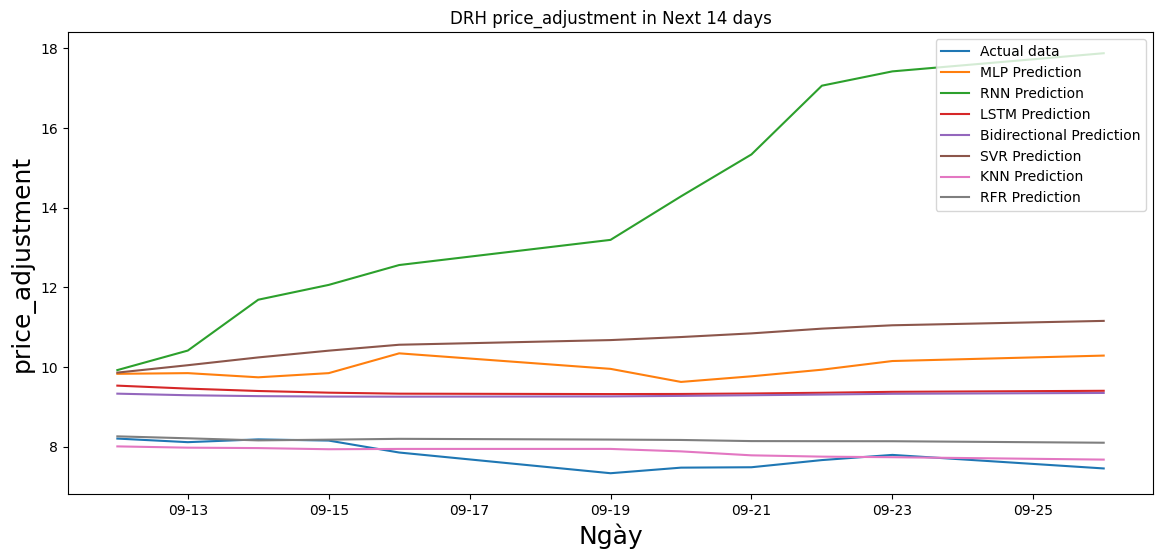

In [94]:
plot_Next2Week(actual, predict_2Week)

# **9. Multivariate**

Nãy giờ mới chỉ dùng một Feature để dự đoán một Feature. Bây giờ thì phần này sẽ dùng nhiều Feature để dự đoán nhiều Feature.

In [95]:
import pandas as pd
base_df = pd.read_csv("DRH.csv", index_col='date_publish', parse_dates=True, dayfirst=True)

## 9.1 Tiền xử lý

In [96]:
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np

In [97]:
# Tạo một dataframe mới với tất cả cột có kiểu float và index-column là Date:
data2 = base_df.loc[:, base_df.dtypes == float]
# Convert dataframe trên thành numpy array:
dataset2 = data2.values
# Số lượng các dòng sẽ dùng để train model:
training_data_length = math.ceil(len(dataset2)*0.85) # Lấy 85% để training

# print(data[:5])
print("dataset =", dataset2[:5])
print("training_data_length =", training_data_length)

dataset = [[ 8.20000000e+00  1.06500000e+01  6.70000000e-01  2.34956000e+06
   2.40300000e+10  0.00000000e+00  0.00000000e+00  9.88000000e+00
   1.06500000e+01  9.69000000e+00]
 [ 8.47000000e+00  1.10000000e+01  3.50000000e-01  2.53110000e+06
   2.82990000e+10  1.90428000e+05  1.88714148e+09  1.12000000e+01
   1.13500000e+01  1.08000000e+01]
 [ 9.01000000e+00  1.17000000e+01  7.00000000e-01  2.64880000e+06
   2.95540000e+10  0.00000000e+00  0.00000000e+00  1.07500000e+01
   1.17500000e+01  1.07000000e+01]
 [ 9.32000000e+00  1.21000000e+01  4.00000000e-01  2.36250000e+06
   2.82850000e+10  0.00000000e+00  0.00000000e+00  1.17000000e+01
   1.23000000e+01  1.17000000e+01]
 [ 9.17000000e+00  1.19000000e+01 -2.00000000e-01  2.44510000e+06
   2.91770000e+10  0.00000000e+00  0.00000000e+00  1.24000000e+01
   1.24000000e+01  1.18000000e+01]]
training_data_length = 391


In [98]:
def scaling_data(dataset, min, max):
  # Preprocessing, Tiền xử lý dữ liệu (giúp model dễ chạy hơn) bằng cách Scale nó
  scaler = MinMaxScaler(feature_range=(min, max)) # MinMaxScaler object giúp
  scaled_data = scaler.fit_transform(dataset) # transfrom dữ liệu để chúng có giá trị trong khoảng [min, max], ví dụ: [0, 1]
  print(scaled_data[0:5])
  return scaled_data, scaler

In [99]:
scaled_data2, scaler2 = scaling_data(dataset2, 0, 1) # 'scaled_data2' khác 'scaled_data'.
print(scaled_data2.shape) # Do bây giờ làm việc với nhiều Feature, còn trước đó chỉ có một là ChoosenCol.

[[0.15907208 0.19270833 0.7        0.3394283  0.1586379  0.
  0.         0.17162033 0.17781742 0.17713526]
 [0.17025684 0.20343137 0.63043478 0.36644197 0.18889818 0.09970052
  0.07052981 0.21380633 0.19863217 0.21402459]
 [0.19262635 0.22487745 0.70652174 0.38395607 0.1977941  0.
  0.         0.19942474 0.21052632 0.21070123]
 [0.2054681  0.23713235 0.64130435 0.34135381 0.18879895 0.
  0.         0.22978587 0.22688076 0.24393486]
 [0.19925435 0.2310049  0.51086957 0.35364493 0.19512178 0.
  0.         0.25215724 0.2298543  0.24725823]]
(460, 10)


## 9.2 Tạo tập Train & Test

In [100]:
# Tạo TRAINING data set (có bị scale)
train_data2 = scaled_data2[0:training_data_length, :] # Lấy các giá trị có index từ 0 đến training_data_length, chọn tất cả cột.
x2_train = []
y2_train = []
n = 63
for i in range(n, len(train_data2)):
  x2_train.append(train_data2[i-n:i, 0:train_data2.shape[1]]) # Lấy tất cả cột chứ không chỉ một như mấy phần trước.
  # y2_train.append(train_data2[i, 0]) # Lấy một cột thôi.
  y2_train.append(train_data2[i, :]) # Lấy tất cả các cột.
# Convert x_train và y_train thành numpy array (để ta có thể dùng training cho các mô):
x2_train, y2_train = np.array(x2_train), np.array(y2_train)

In [101]:
print(x2_train.shape) # x2_train có dạng 3 chiều: number of samples (328), number of time steps (63) per sample, number of features (10)
print(y2_train.shape) # y2_train có dạng 2 chiều: number of samples (328), number of time variables per sample to be predicted (10)
x2_train_3dim = x2_train # Một vài mô hình như LSTM vẫn sẽ làm việc với dữ liệu 3 chiều của bài toán Multivariate time series Forecasting. Do đó, giữ lại tập train 2 chiều này cho những mô hình như thế.

(328, 63, 10)
(328, 10)


In [102]:
# MLP yêu cầu shape của input của từng mẫu dữ liệu phải là một vector.
# Nói cách khác, với multivariate input, chúng ta sẽ có nhiều vector, mỗi cái là một time step.
# Do đó, ta sẽ cần thực hiện Flatten Input để chuyển đổi cấu trúc 3 chiều của các mẫu dữ liệu
# thành cấu trúc 2 chiều có dạng (samples, features).
n_input = x2_train.shape[1] * x2_train.shape[2] # Độ dài của mỗi input vector sẽ bằng = time steps * features.
x2_train = x2_train.reshape((x2_train.shape[0], n_input)) # Reshape dựa vào kích thước của vector ở trên.
print(x2_train.shape)
n_output = y2_train.shape[1] # Kích thước Output mà model sẽ trả về.
print(n_output)

(328, 630)
10


In [103]:
# Tạo TESTING data set:
test_data2 = scaled_data2[training_data_length-n:, :] # Lấy tất cả column.
x2_test = []
y2_test = dataset2[training_data_length:, :] # y_test không bị scale.
for i in range(n, len(test_data2)):
  x2_test.append(test_data2[i-n:i, 0:test_data2.shape[1]])
# Convert x_train và y_train sang numpy array:
x2_test = np.array(x2_test)
y2_test = np.array(y2_test)
x2_test_3dim = x2_test # Một vài mô hình như LSTM vẫn sẽ làm việc với dữ liệu 3 chiều của bài toán Multivariate time series Forecasting. Do đó, cần thiết giữ lại mấy cái x_test, X_test 3 chiều như này.

In [104]:
# Flatten Input:
print(x2_test.shape)
x2_test = x2_test.reshape((x2_test.shape[0], x2_test.shape[1]*x2_test.shape[2]))
print(x2_test.shape)
print(y2_test.shape)

(69, 63, 10)
(69, 630)
(69, 10)


## 9.3 Khởi tạo mô hình & Chạy thử

In [105]:
from keras.models import Sequential # Để khởi tạo model
from keras.layers import Dense # Để thêm layer cho model
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [106]:
def make_MultiPRED(Model, x2_test):
  # Dùng ModelName để dự đoán giá ChoosenCol dựa trên dữ liệu đầu vào đã scale.
  # Do chúng ta cần biến predictions (hay y_pred) phải chứa cùng giá trị với y_test (mà dữ liệu trong y_test lại không có bị scale):
  predictions = Model.predict(x2_test)
  predictions = scaler2.inverse_transform(predictions) # UnScaling các giá trị.
  return predictions

### 9.3.1 MLP

In [107]:
# MLP:
MLP2_model = Sequential()
MLP2_model.add(Dense(90, activation='relu', input_dim=n_input))
MLP2_model.add(Dropout(0.2))
MLP2_model.add(Dense(30, activation='relu', input_dim=n_input))
MLP2_model.add(Dropout(0.2))
MLP2_model.add(Dense(n_output))
MLP2_model.compile(optimizer='adam', loss='mse')
MLP2_model.fit(x2_train, y2_train, epochs=500, verbose=0) # Tập train của MLP là 2 chiều.

### 9.3.2 RNN

In [108]:
# RNN:
RNN2_model = Sequential()
RNN2_model.add(SimpleRNN(units = 50, return_sequences=True, input_shape=(n,  10))) # input_shape=(number of time steps, number of features)
RNN2_model.add(Dropout(0.2))
RNN2_model.add(SimpleRNN(units = 97, return_sequences=True))
RNN2_model.add(Dropout(0.2))
RNN2_model.add(SimpleRNN(units = 50, return_sequences=False))
RNN2_model.add(Dropout(0.2))
RNN2_model.add(Dense(n_output))
RNN2_model.compile(optimizer="adam", loss="mse")
RNN2_model.fit(x2_train_3dim, y2_train, epochs=20, verbose=0)

### 9.3.3 LSTM

In [109]:
# LSTM:
LSTM2_model = Sequential() # LSTM của Multivariate cũng tương tự như phiên bản Univariate ở phần 6.
LSTM2_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(f, 10))) # input_shape=(number of time steps, number of features)
LSTM2_model.add(Dropout(0.2))
LSTM2_model.add(LSTM(50, activation='relu'))
LSTM2_model.add(Dropout(0.2))
LSTM2_model.add(Dense(n_output)) # Chỉ khác ở chỗ number of output là nhiều hơn thôi.
LSTM2_model.compile(optimizer='adam', loss='mse')
LSTM2_model.fit(x2_train_3dim, y2_train, epochs=20, verbose=0) # Tập train của LSTM là 3 chiều.

### 9.3.4 Bidirectional

In [110]:
Bidirec2_model = Sequential()
Bidirec2_model.add(Bidirectional(LSTM(units = 50, activation='relu', return_sequences=True, input_shape =(n, 10)))) # đầu vào tương tự LSTM
Bidirec2_model.add(Dropout(0.2))
Bidirec2_model.add(Bidirectional(LSTM(units = 50, activation='relu', return_sequences=True)))
Bidirec2_model.add(Dropout(0.2))
Bidirec2_model.add(Bidirectional(LSTM(units = 50, activation='relu', return_sequences=False)))
Bidirec2_model.add(Dropout(0.2))
Bidirec2_model.add(Dense(n_output))
Bidirec2_model.compile(optimizer="adam", loss="mse")
Bidirec2_model.build(x2_train_3dim.shape)
Bidirec2_model.fit(x2_train_3dim, y2_train, epochs=20, verbose=0)

## 9.4 Chạy thử mô hình

In [111]:
MLP2_y_pred = make_MultiPRED(MLP2_model, x2_test)
RNN2_y_pred = make_MultiPRED(RNN2_model, x2_test_3dim)
LSTM2_y_pred = make_MultiPRED(LSTM2_model, x2_test_3dim)
Bidirec2_y_pred = make_MultiPRED(Bidirec2_model, x2_test_3dim)
# make_evaluation("MLP", MLP2_y_pred, y2_test)

3/3 [==============================] - 1s 19ms/step


In [112]:
make_evaluation("MLP", MLP2_y_pred, y2_test)
make_evaluation("RNN", RNN2_y_pred, y2_test)
make_evaluation("LSTM", LSTM2_y_pred, y2_test)
make_evaluation("Bidirectional", Bidirec2_y_pred, y2_test)

MLP RMSE:  847658488.5491385
MLP MSE:  6.505525654028401e+18
MLP MAE:  673416587.4944212
RNN RMSE:  1291596759.4048445
RNN MSE:  1.3453115076270879e+19
RNN MAE:  1069350672.6196582
LSTM RMSE:  781013717.8239934
LSTM MSE:  5.470997132237571e+18
LSTM MAE:  611783126.6200845
Bidirectional RMSE:  921324298.0079193
Bidirectional MSE:  7.787971138866538e+18
Bidirectional MAE:  738794146.8252792


In [113]:
def create_TestDataForDrawing(training_data_length, ModelName_y_pred):
  df2 = data2[training_data_length:]
  df2["price_adjustment_pred"] = ModelName_y_pred[:, 0]
  df2["price_closing_pred"] = ModelName_y_pred[:, 1]
  df2["rate_of_change_pred"] = ModelName_y_pred[:, 2]
  df2["gdkl_kl_pred"] = ModelName_y_pred[:, 3]
  df2["gdkl_gt_pred"] = ModelName_y_pred[:, 4]
  df2["gdtt_kl_pred"] = ModelName_y_pred[:, 5]
  df2["gdtt_gt_pred"] = ModelName_y_pred[:, 6]
  df2["price_open_pred"] = ModelName_y_pred[:, 7]
  df2["price_highest_pred"] = ModelName_y_pred[:, 8]
  df2["price_lowest_pred"] = ModelName_y_pred[:, 9]
  return df2

In [114]:
def draw_10ColsMulti(df2, save_name='', MonthAndDay=False):
  fig, ax = plt.subplots(2, 5, figsize=(20, 8))
  if(MonthAndDay==True):
    # df2 = df2.reset_index(level='date_publish')
    # df2["month_publish"] = df2["date_publish"].dt.strftime('%d')
    df2["month_publish"] = df2.index.strftime('%d')
    df2.plot(x="month_publish", y=["price_closing", "price_closing_pred"], ax=ax[0][0])
    df2.plot(x="month_publish", y=["price_open", "price_open_pred"], ax=ax[0][1])
    df2.plot(x="month_publish", y=["price_adjustment", "price_adjustment_pred"], ax=ax[0][2])
    df2.plot(x="month_publish", y=["rate_of_change", "rate_of_change_pred"], ax=ax[0][3])
    df2.plot(x="month_publish", y=["gdkl_kl", "gdkl_kl_pred"], ax=ax[0][4])
    df2.plot(x="month_publish", y=["gdkl_gt", "gdkl_gt_pred"], ax=ax[1][0])
    df2.plot(x="month_publish", y=["gdtt_kl", "gdtt_kl_pred"], ax=ax[1][1])
    df2.plot(x="month_publish", y=["gdtt_gt", "gdtt_gt_pred"], ax=ax[1][2])
    df2.plot(x="month_publish", y=["price_highest", "price_highest_pred"], ax=ax[1][3])
    df2.plot(x="month_publish", y=["price_lowest", "price_lowest_pred"], ax=ax[1][4])
  else:
    df2.plot(y=["price_closing", "price_closing_pred"], ax=ax[0][0])
    df2.plot(y=["price_open", "price_open_pred"], ax=ax[0][1])
    df2.plot(y=["price_adjustment", "price_adjustment_pred"], ax=ax[0][2])
    df2.plot(y=["rate_of_change", "rate_of_change_pred"], ax=ax[0][3])
    df2.plot(y=["gdkl_kl", "gdkl_kl_pred"], ax=ax[0][4])
    df2.plot(y=["gdkl_gt", "gdkl_gt_pred"], ax=ax[1][0])
    df2.plot(y=["gdtt_kl", "gdtt_kl_pred"], ax=ax[1][1])
    df2.plot(y=["gdtt_gt", "gdtt_gt_pred"], ax=ax[1][2])
    df2.plot(y=["price_highest", "price_highest_pred"], ax=ax[1][3])
    df2.plot(y=["price_lowest", "price_lowest_pred"], ax=ax[1][4])
  fig.tight_layout()
  if(save_name != ''):
    fig.suptitle(str(save_name), fontsize=14)
    plt.savefig(str(save_name)+'.png', bbox_inches='tight')
    plt.close()
  else:
    plt.show()

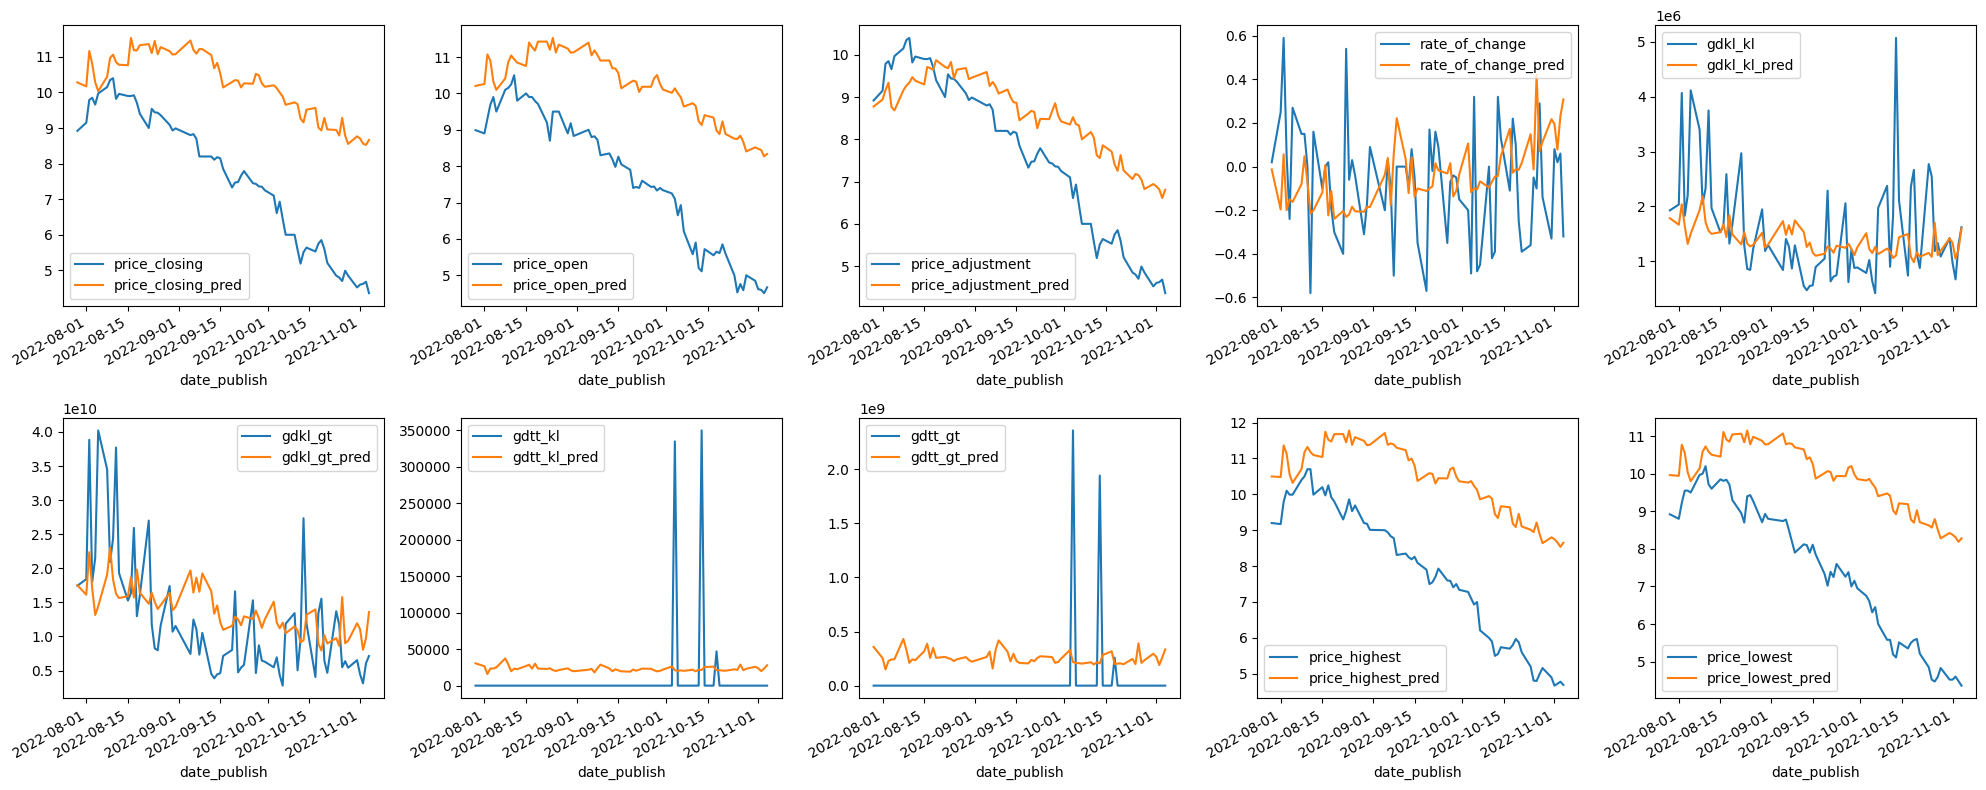

In [115]:
# MLP:
draw_10ColsMulti(create_TestDataForDrawing(training_data_length, MLP2_y_pred))

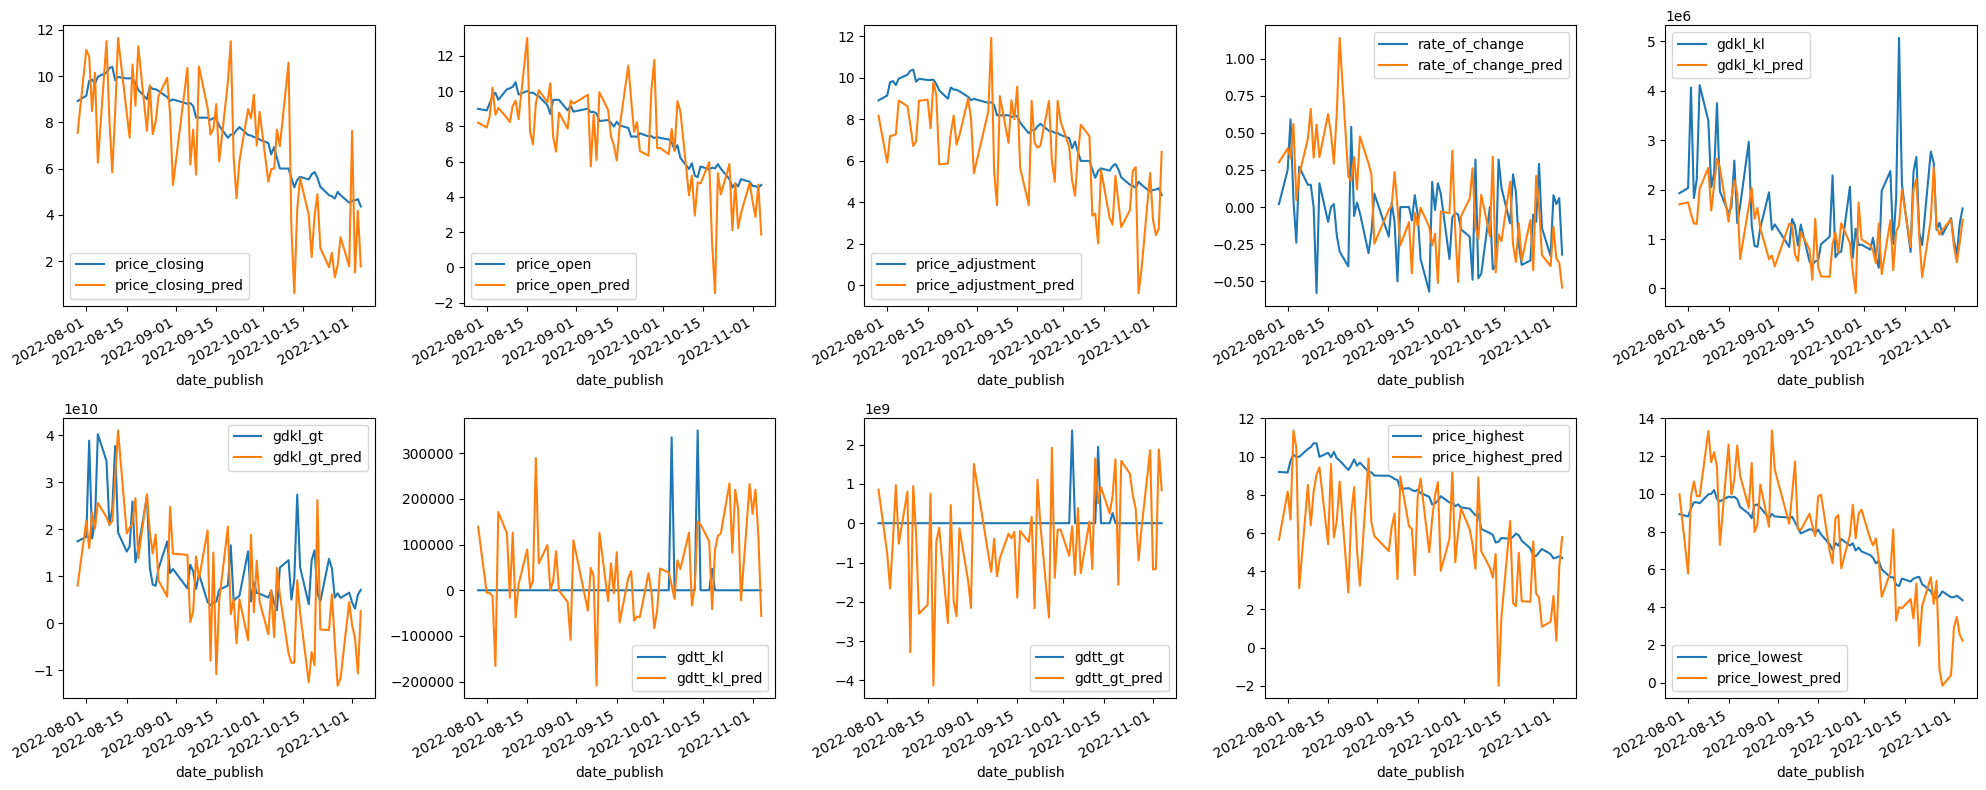

In [116]:
# RNN:
draw_10ColsMulti(create_TestDataForDrawing(training_data_length, RNN2_y_pred))

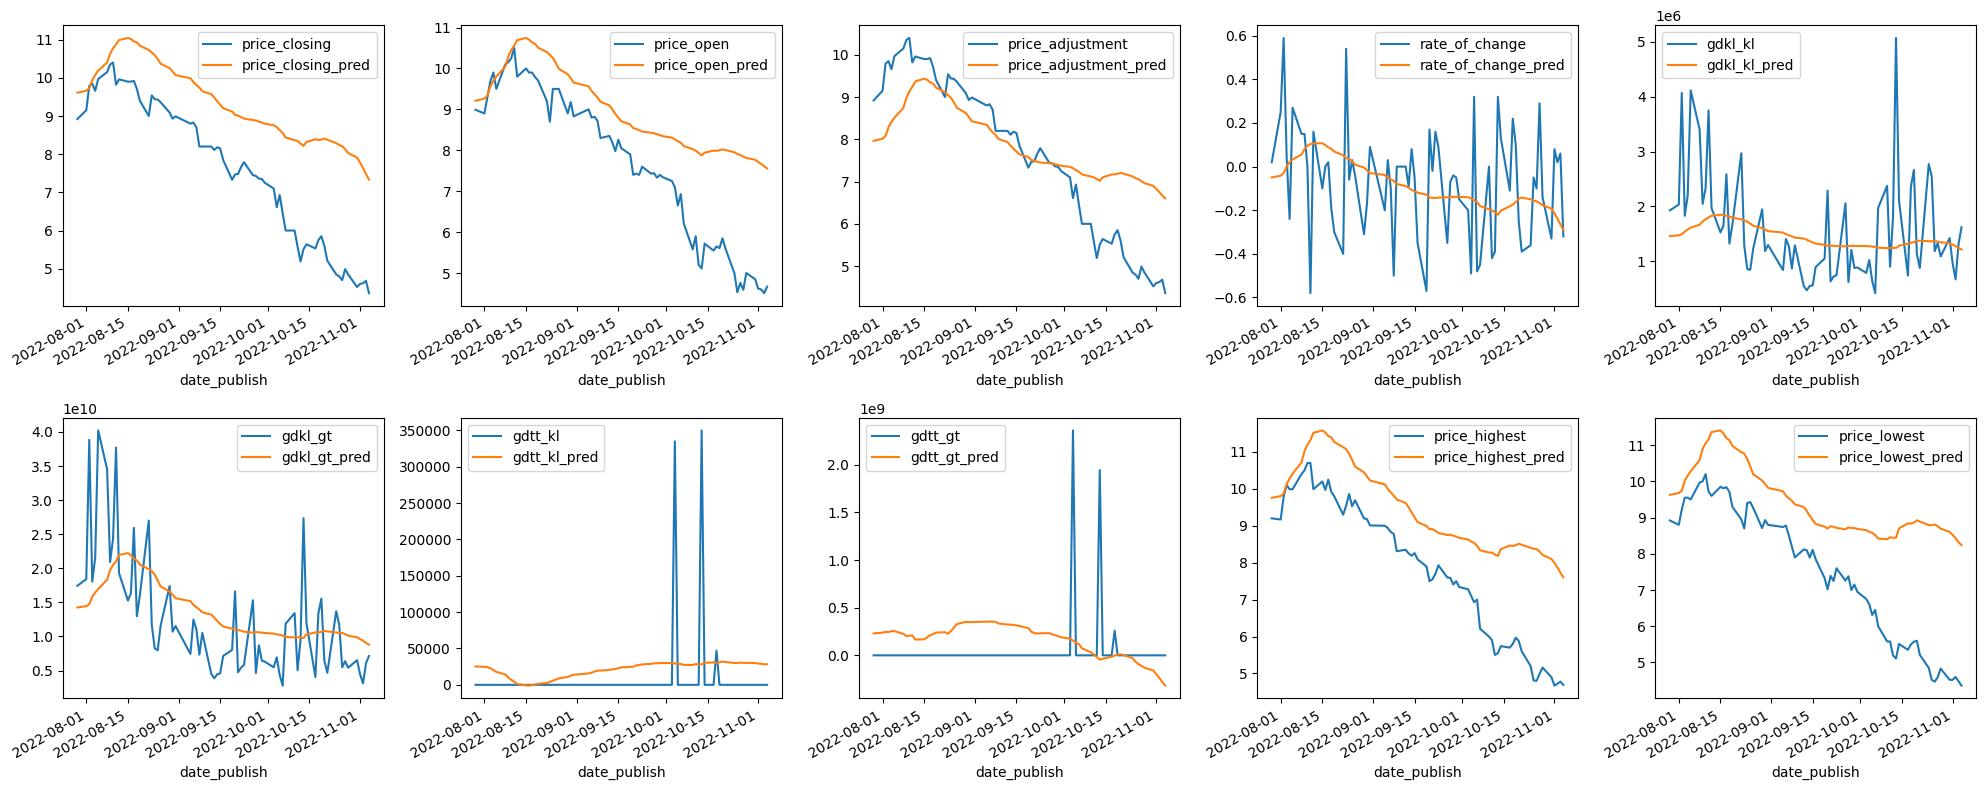

In [117]:
# LSTM:
draw_10ColsMulti(create_TestDataForDrawing(training_data_length, LSTM2_y_pred))

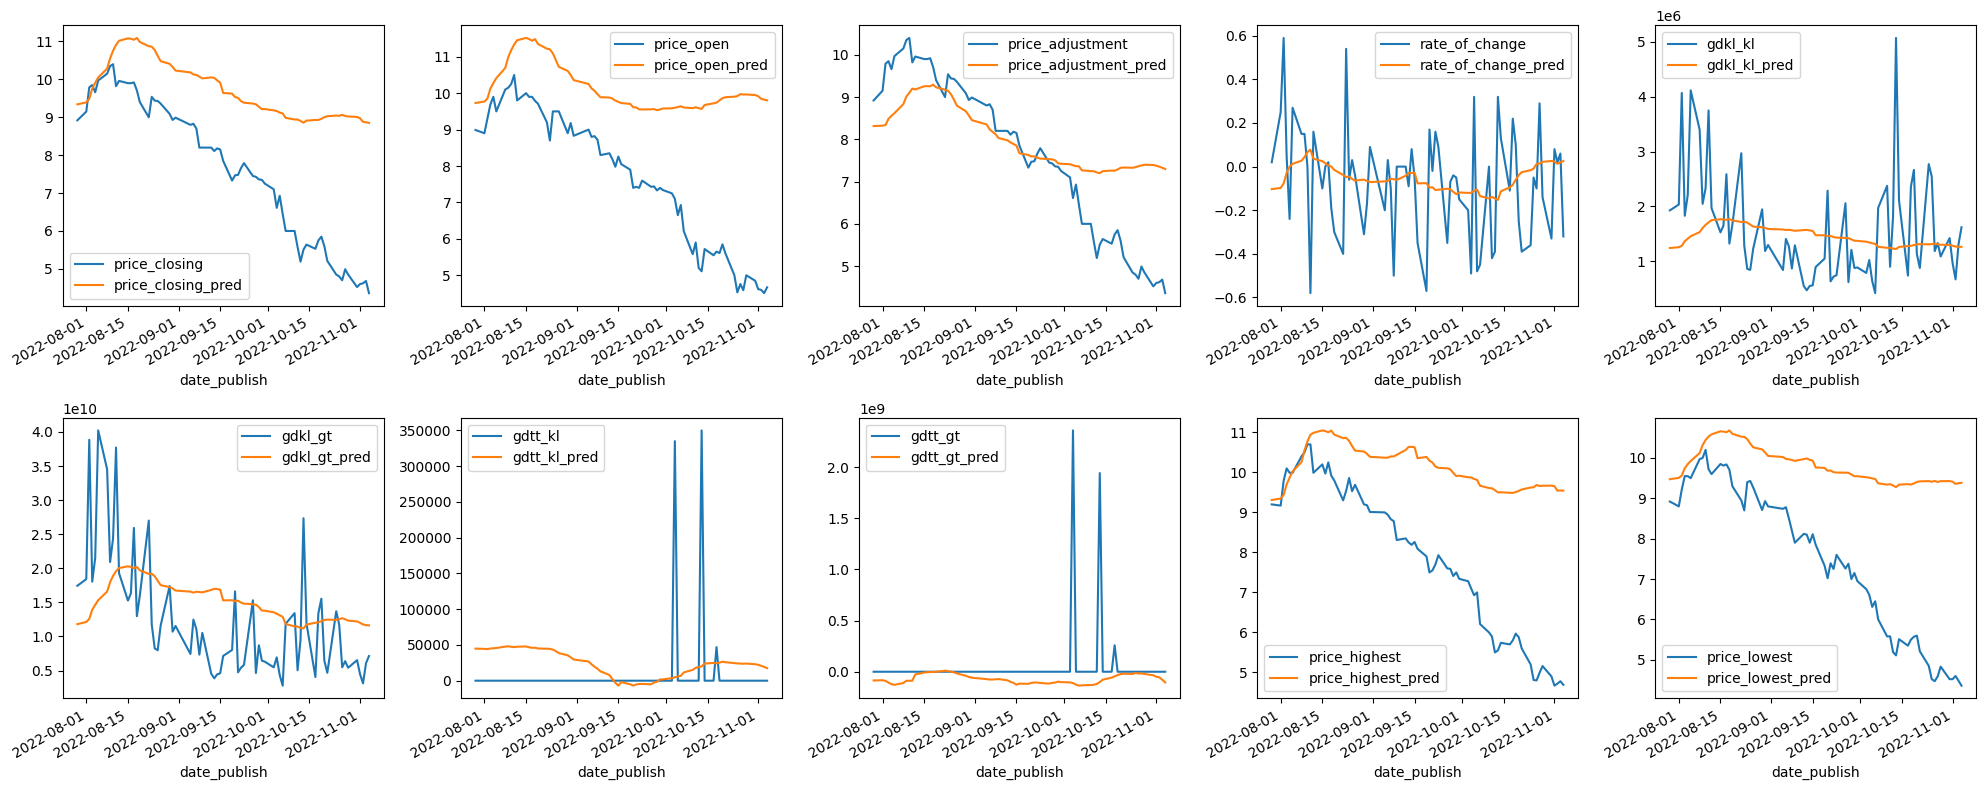

In [118]:
# Bidrectional:
draw_10ColsMulti(create_TestDataForDrawing(training_data_length, Bidirec2_y_pred))

## 9.5 Đưa ra dự đoán dựa trên mô hình đang có

In [119]:
def X2_test_toModelMulti(X2_test, Model, threeDimension=False):
  X2_test = np.array(X2_test) # Convert X_test từ dạng list sang thành numpy array.
  if(threeDimension==False):
    # Nếu đưa vào X_test 3 chiều thì cần Flatten nó thành 2 chiều:
    X2_test = X2_test.reshape((X2_test.shape[0], X2_test.shape[1]*X2_test.shape[2]))    
  pred_price = Model.predict(X2_test) # Dùng model để dự đoán.
  return pred_price

In [120]:
# Hàm chạy để khởi tạo và hoàn thiện tập X2_test, thông qua đó mà hoàn thiện run_data2.
# Do lấy ngày dự đoán được để dự đoán tiếp ngày mai, nên chúng ta lấy luôn Data, không cần X2_test nữa.
def make_X2_testMulti(run_data_MaxLength2, run_data2, Model, threeDimension=False):
  count = 0
  X2_test = []
  for i in range(n, run_data_MaxLength2):
    X2_test.append(run_data2[i-n:i, :])
    pred_price = X2_test_toModelMulti([X2_test[count]], Model, threeDimension) # Đưa vào Model để nó dự đoán, nhận về kết quả là ngày tiếp theo có gì? được lưu vào biến pred_price.
    run_data2 = np.concatenate((run_data2, pred_price)) # Rồi ta đưa ngày mà Model mới dự đoán ấy (pred_price) vào dữ liệu (run_data2) để tiếp tục chạy dự đoán ngày tiếp theo.
    count += 1 # Giúp định vị xem đang ở đâu trong X2_test. Bởi chúng ta chỉ muốn lấy đúng n ngày quá khứ gần nhất để dự đoán ngày n+1 mà thôi.
  # Bỏ scale để vẽ biểu đồ:
  run_data_unscale = scaler2.inverse_transform(run_data2) # UnScaling.
  run_data_unscale = run_data_unscale[n:run_data_MaxLength2] # Bỏ n ngày quá khứ dùng cho việc dự đoán ngày đầu tiên. Bởi vì n ngày này là dữ liệu chắc đúng.
  return run_data_unscale # Những gì trả về sẽ chỉ còn lại toàn là dự đoán và dự đoán mà thôi.

# Tạo RUN data set:
run_data_MaxLength2 = len(scaled_data2[Week7_StartDay:Week7_EndDay, :]) # Độ dài (số Ngày hay số Dòng) tối đa mà run_data2 có thể có.
run_data2 = scaled_data2[Week7_StartDay:Week7_StartDay+n, :] # Tổng thể thì biến run_data2 ban đầu chỉ chứa n ngày trước ngày đầu tiên trong 7 tuần dữ liệu. Ví dụ: nếu n=63 thì len(run_data2)=63
# Chi tiết hơn, thì run_data2[index1] là nơi chứa 1 dòng dữ liệu, ứng với một ngày.
# -> Ví dụ: run_data2[index1 = 0] ~ run_data2[Ngày thứ 1] = Dữ liệu ngày thứ 1;
# Bên trong mỗi ngày, lại có thêm giá trị của tất cả các features như Giá đóng cửa, mở cửa, điều chỉnh, giao dịch thỏa thuận, ... của ngày đó. 
# -> Ví dụ: run_data2[index1 = 0][index2 = 0] ~ Với index2=0 là cột chứa Giá điều chỉnh, thì ta có: Dữ liệu giá Điều chỉnh vào Ngày thứ 1.

Nếu bị lỗi liên quan tới `Week7_StartDay` hoặc `Week7_EndDay`, vui lòng chạy lại phần 8.1 - Lấy ngày trung thực.

In [121]:
MLP_run_data_unscale2 = make_X2_testMulti(run_data_MaxLength2, run_data2, MLP2_model, False)
RNN_run_data_unscale2 = make_X2_testMulti(run_data_MaxLength2, run_data2, RNN2_model, True)
LSTM_run_data_unscale2 = make_X2_testMulti(run_data_MaxLength2, run_data2, LSTM2_model, True)
Bidirec_run_data_unscale2 = make_X2_testMulti(run_data_MaxLength2, run_data2, Bidirec2_model, True)

1/1 [==============================] - 0s 28ms/step


In [122]:
actual2 = data2[Week7_StartDay+n : Week7_EndDay]
make_evaluation("MLP", MLP_run_data_unscale2, actual2)
make_evaluation("RNN", RNN_run_data_unscale2, actual2)
make_evaluation("LSTM", LSTM_run_data_unscale2, actual2)
make_evaluation("Bidirectional", Bidirec_run_data_unscale2, actual2)

MLP RMSE:  956097329.6191975
MLP MSE:  8.177070524718858e+18
MLP MAE:  836772234.5881476
RNN RMSE:  6048479614.020311
RNN MSE:  3.386187427024341e+20
RNN MAE:  5443962677.583849
LSTM RMSE:  823794160.5087719
LSTM MSE:  5.980749302803191e+18
LSTM MAE:  735522104.4696933
Bidirectional RMSE:  1162364012.734213
Bidirectional MSE:  1.2324847757126298e+19
Bidirectional MAE:  1056917560.1976774


## 9.6 Vẽ hình từ kết quả dự đoán

In [123]:
def create_RunDataForDrawing(Week7_StartDay, Week7_EndDay, ModelName_run_data_unscale2, OnlyNext2Week=False):
  if(OnlyNext2Week == True):
    EndMark = Week2_EndDay-(Week2_StartDay+n)
    MultiPredict_7Week = data2[Week2_StartDay+n : Week2_EndDay]
  else:
    EndMark = Week7_EndDay-(Week7_StartDay+n)
    MultiPredict_7Week = data2[Week7_StartDay+n : Week7_EndDay]
  print("Start index:", Week7_StartDay+n, "; Number of Rows before reaching End:", EndMark)
  print("Start day:", base_df.index[Week7_StartDay+n], "; End day:", base_df.index[Week7_StartDay+n+EndMark])
  MultiPredict_7Week["price_adjustment_pred"] = ModelName_run_data_unscale2[:EndMark, 0]
  MultiPredict_7Week["price_closing_pred"] = ModelName_run_data_unscale2[:EndMark, 1]
  MultiPredict_7Week["rate_of_change_pred"] = ModelName_run_data_unscale2[:EndMark, 2]
  MultiPredict_7Week["gdkl_kl_pred"] = ModelName_run_data_unscale2[:EndMark, 3]
  MultiPredict_7Week["gdkl_gt_pred"] = ModelName_run_data_unscale2[:EndMark, 4]
  MultiPredict_7Week["gdtt_kl_pred"] = ModelName_run_data_unscale2[:EndMark, 5]
  MultiPredict_7Week["gdtt_gt_pred"] = ModelName_run_data_unscale2[:EndMark, 6]
  MultiPredict_7Week["price_open_pred"] = ModelName_run_data_unscale2[:EndMark, 7]
  MultiPredict_7Week["price_highest_pred"] = ModelName_run_data_unscale2[:EndMark, 8]
  MultiPredict_7Week["price_lowest_pred"] = ModelName_run_data_unscale2[:EndMark, 9]
  return MultiPredict_7Week

Start index: 420 ; Number of Rows before reaching End: 36
Start day: 2022-09-12 00:00:00 ; End day: 2022-11-01 00:00:00


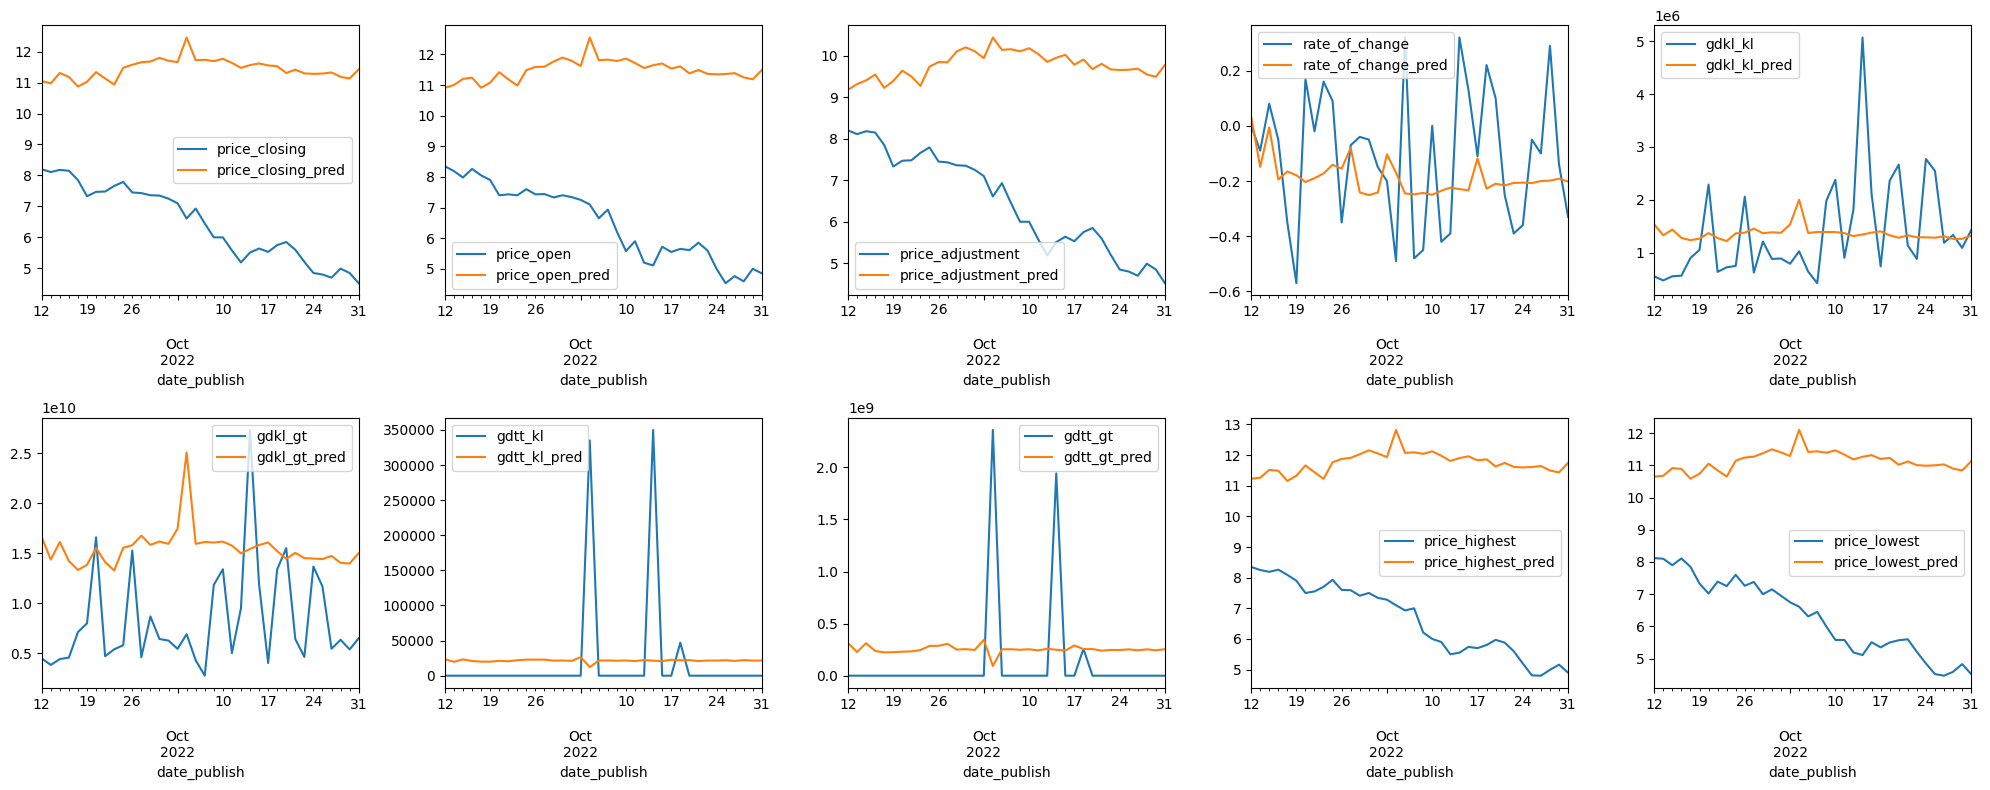

Start index: 420 ; Number of Rows before reaching End: 10
Start day: 2022-09-12 00:00:00 ; End day: 2022-09-26 00:00:00


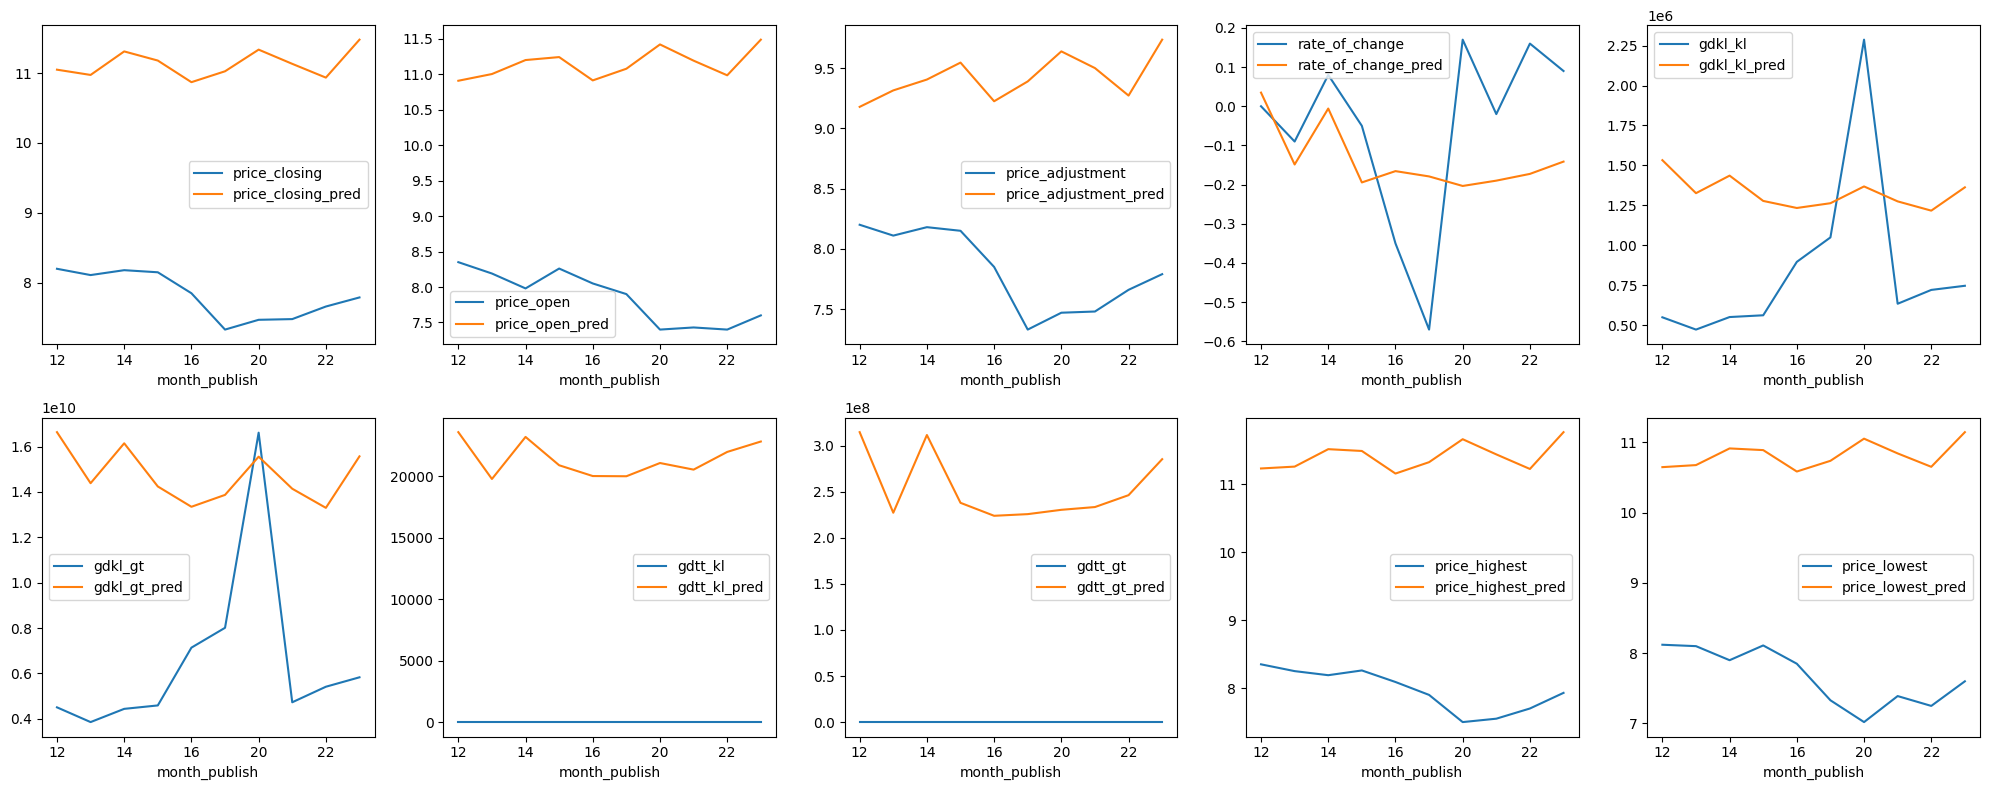

In [124]:
# MLP:
draw_10ColsMulti(create_RunDataForDrawing(Week7_StartDay, Week7_EndDay, MLP_run_data_unscale2))
draw_10ColsMulti(create_RunDataForDrawing(Week7_StartDay, Week7_EndDay, MLP_run_data_unscale2, OnlyNext2Week=True), MonthAndDay=True)

Start index: 420 ; Number of Rows before reaching End: 36
Start day: 2022-09-12 00:00:00 ; End day: 2022-11-01 00:00:00


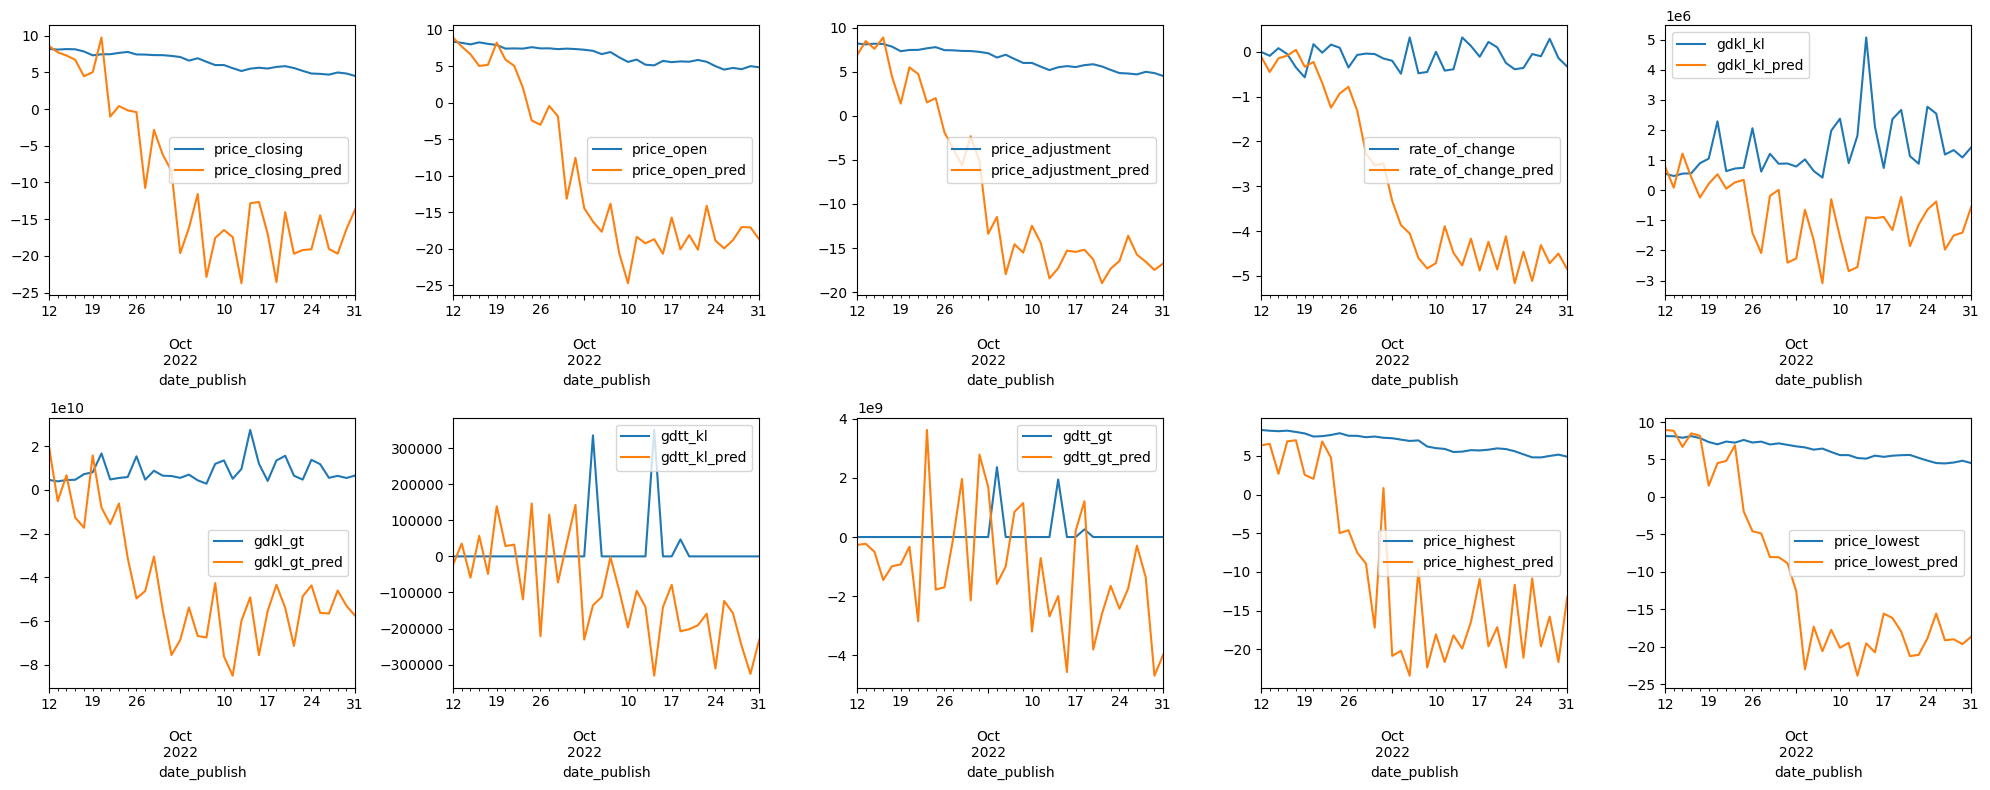

Start index: 420 ; Number of Rows before reaching End: 10
Start day: 2022-09-12 00:00:00 ; End day: 2022-09-26 00:00:00


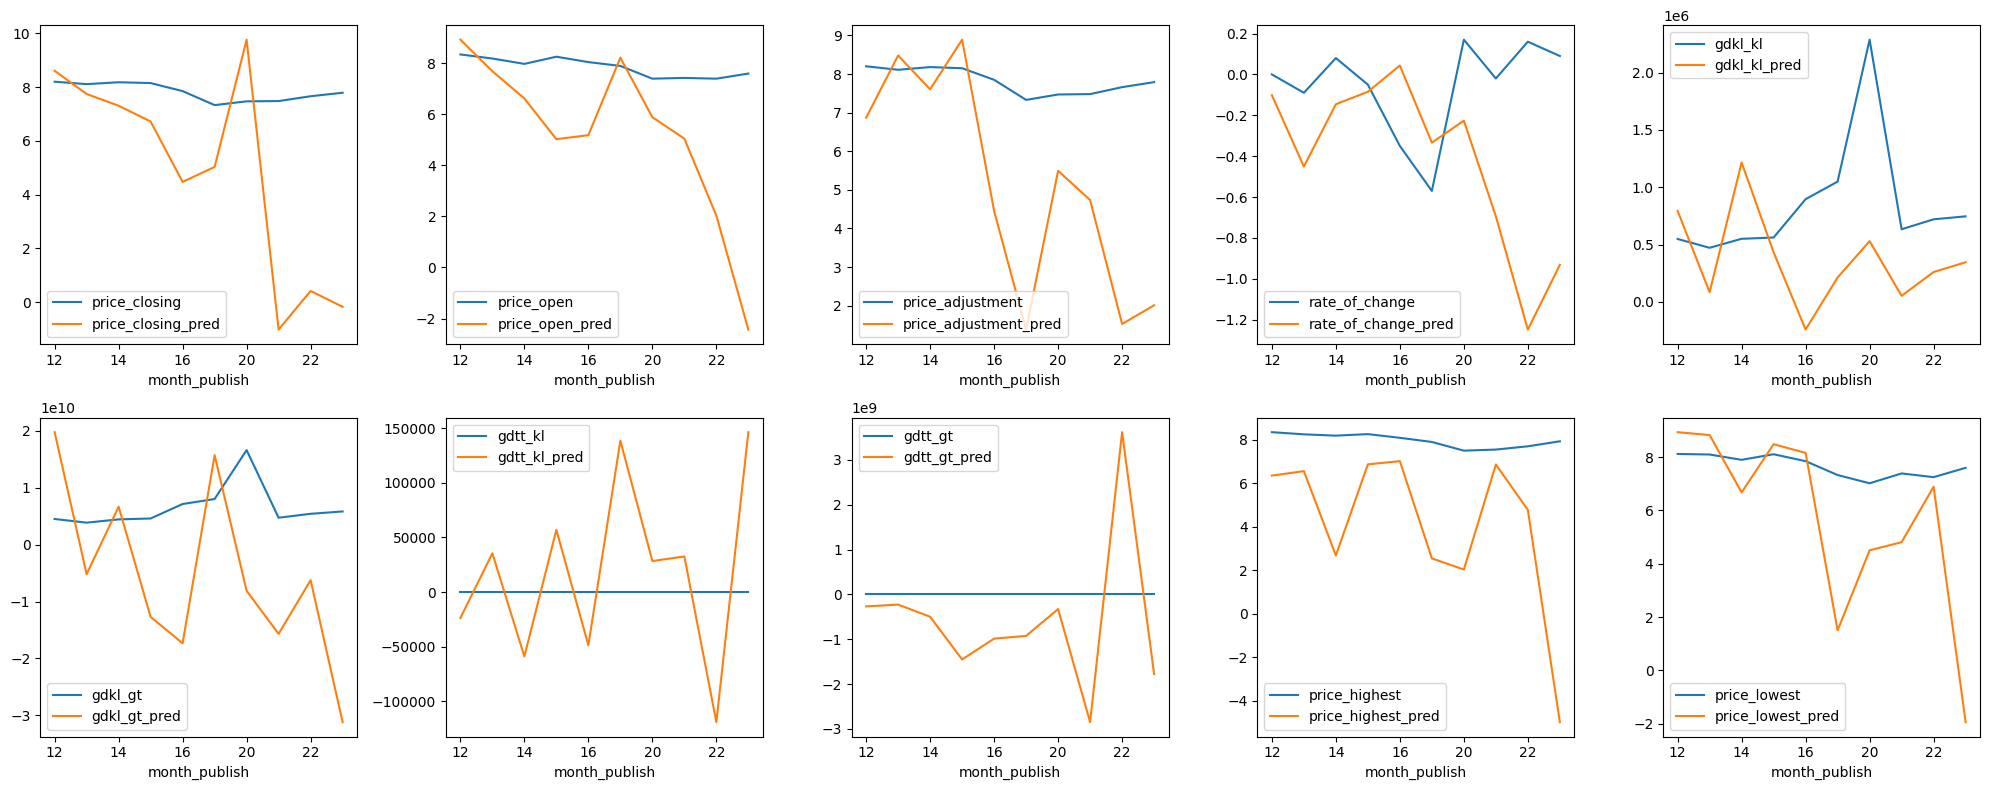

In [125]:
# RNN:
draw_10ColsMulti(create_RunDataForDrawing(Week7_StartDay, Week7_EndDay, RNN_run_data_unscale2))
draw_10ColsMulti(create_RunDataForDrawing(Week7_StartDay, Week7_EndDay, RNN_run_data_unscale2, OnlyNext2Week=True), MonthAndDay=True)

Start index: 420 ; Number of Rows before reaching End: 36
Start day: 2022-09-12 00:00:00 ; End day: 2022-11-01 00:00:00


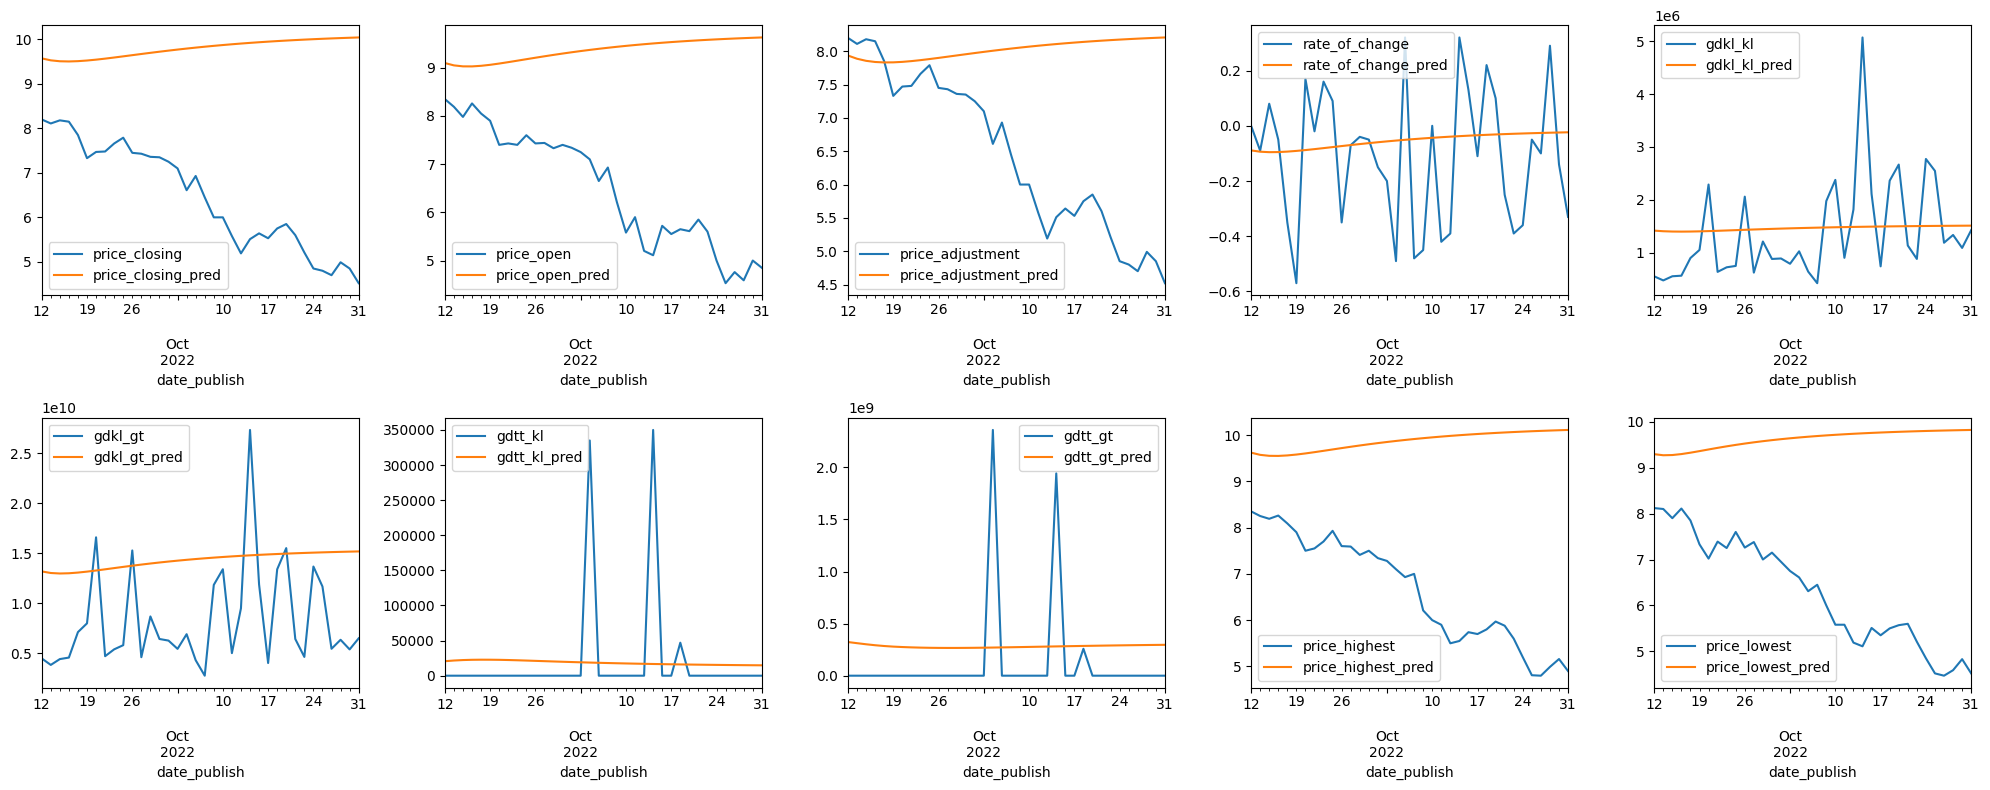

Start index: 420 ; Number of Rows before reaching End: 10
Start day: 2022-09-12 00:00:00 ; End day: 2022-09-26 00:00:00


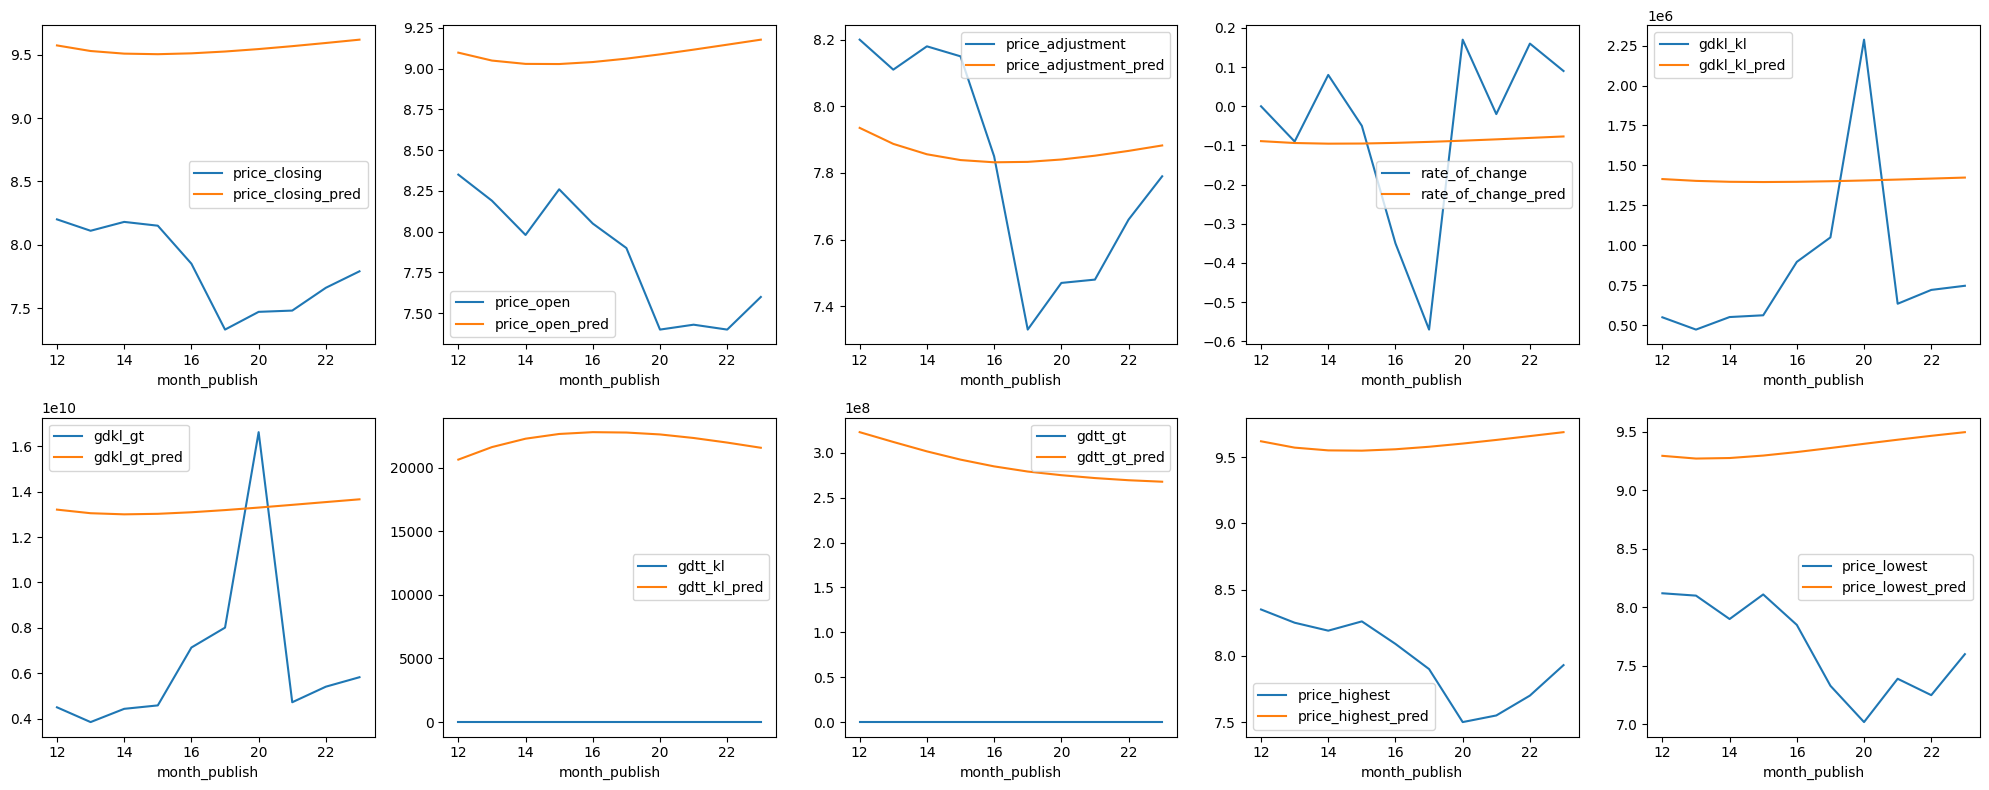

In [126]:
# LSTM:
draw_10ColsMulti(create_RunDataForDrawing(Week7_StartDay, Week7_EndDay, LSTM_run_data_unscale2))
draw_10ColsMulti(create_RunDataForDrawing(Week7_StartDay, Week7_EndDay, LSTM_run_data_unscale2, OnlyNext2Week=True), MonthAndDay=True)

Start index: 420 ; Number of Rows before reaching End: 36
Start day: 2022-09-12 00:00:00 ; End day: 2022-11-01 00:00:00


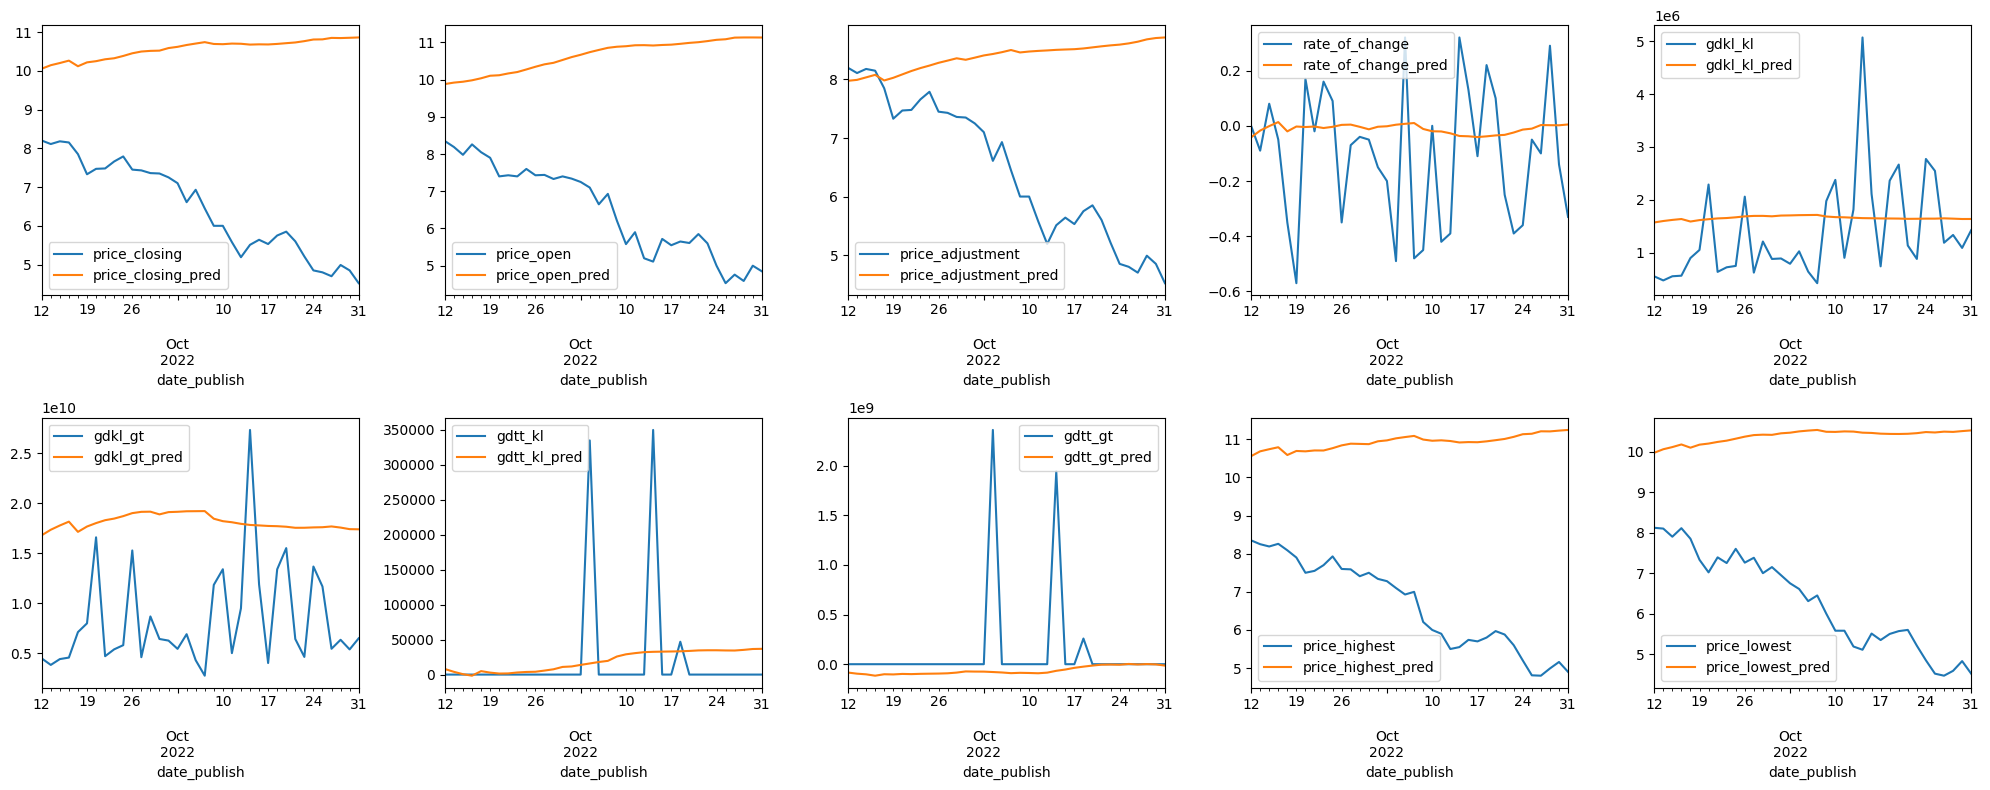

Start index: 420 ; Number of Rows before reaching End: 10
Start day: 2022-09-12 00:00:00 ; End day: 2022-09-26 00:00:00


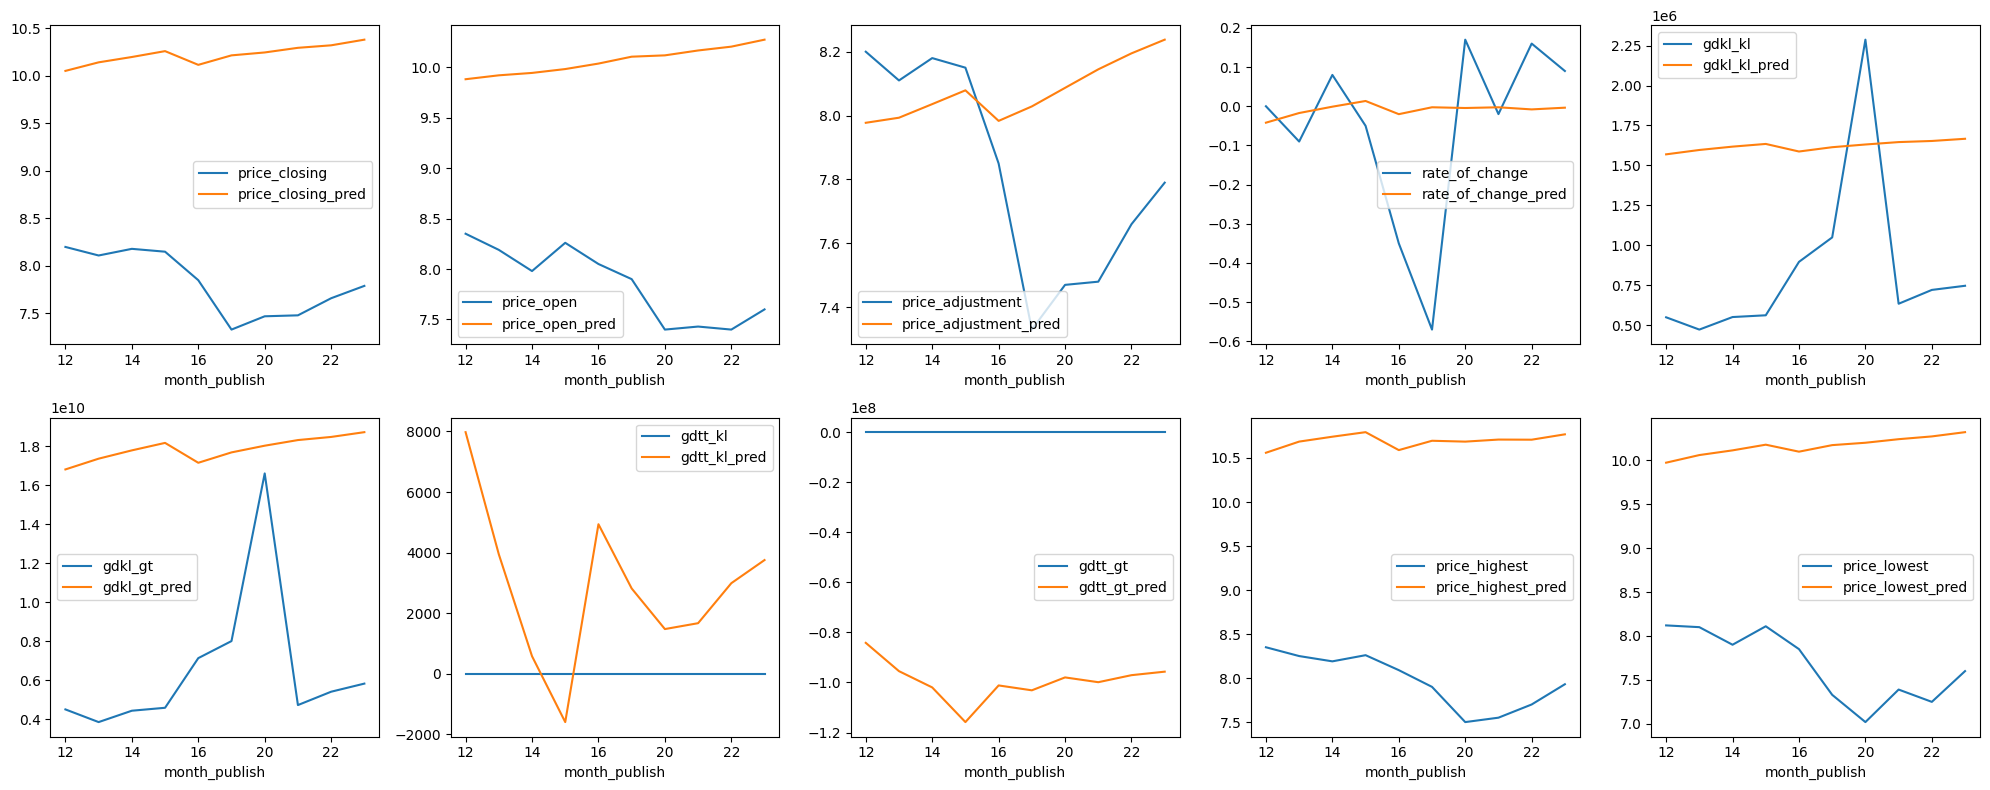

In [127]:
# Bidirectional:
draw_10ColsMulti(create_RunDataForDrawing(Week7_StartDay, Week7_EndDay, Bidirec_run_data_unscale2))
draw_10ColsMulti(create_RunDataForDrawing(Week7_StartDay, Week7_EndDay, Bidirec_run_data_unscale2, OnlyNext2Week=True), MonthAndDay=True)